# Trabajo Integrador - Análisis de Datos - CEIA - Cohorte 11

## Integrantes del grupo
María Alejandra Del Porto - alejandradelporto@gmail.com<br>
Juan Ignacio Munar - juanimunar@gmail.com<br>
Federico Otero - fede.e.otero@gmail.com<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import re, requests
from category_encoders import BinaryEncoder
import scipy.stats as stats

In [2]:
pd.options.mode.chained_assignment = None

## 1. Selección del dataset

Elegimos el **dataset 1**, que contiene datos sobre distintas estaciones meteorológicas de Australia.

In [3]:
# Seteo esta opcion en True para evitar que me exprese los valores numericos con notacion cientifica
np.set_printoptions(suppress=True)

In [4]:
australian_weather_data = pd.read_csv('./data/weatherAUS.csv',encoding='utf-8',sep=',',skipinitialspace=True)

In [5]:
australian_weather_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 2. EDA Inicial

In [6]:
australian_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

| Variable | Descripción | Tipo | Es informativa | Entrada / Salida | 
| -------- | ---------- | ---- | -------------- | ---------------- |
| Date     | Fecha de la medición | Fecha/Hora | Si | Entrada |
| Location | Ubicación geográfica | Categorica Nominal | Si | Entrada |
| MinTemp | Temperatura mínima registrada (celsius) | Numérica Continua | Si | Entrada |
| MaxTemp | Temperatura máxima registrada (celsius) |Numérica Continua | Si | Entrada |
| Rainfall | Precipitaciones registradas (mm) | Numérica Continua | Si | Entrada |
| Evaporation | Evaporación registrada (mm) | Numérica Continua | Si | Entrada |
| Sunshine | Cantidad de horas de sol | Numérica Continua | Si | Entrada |
| WindGustDir | Dirección del viento más fuerte registrado durante el día | Categórica Nominal | Si | Entrada |
| WindGustSpeed | Velocidad del viento más fuerte registrada durante el día (km/h) | Numérica continua | Si | Entrada |
| WindDir9am | Dirección del viento registrada a las 9 am | Categórica Nominal | Si | Entrada |
| WindDir3pm | Dirección del viento registrada a las 3 pm | Categórica Nominal | Si | Entrada |
| WindSpeed9am | Velocidad del viento registrada a las 9 am (km/h) | Numérica continua | Si | Entrada |
| WindSpeed3pm | Velocidad del viento registrada a las 3 pm (km/h) | Numérica continua | Si | Entrada |
| Humidity9am | Humedad registrada a las 9 am (%) | Numérica continua | Si | Entrada |
| Humidity3pm | Humedad registrada a las 3 pm (%) | Numérica continua | Si | Entrada |
| Pressure9am | Presión atmosférica registrada a las 9 am (hpa) | Numérica continua | Si | Entrada |
| Pressure3pm | Presión atmosférica registrada a las 3 pm (hpa) | Numérica continua | Si | Entrada |
| Cloud9am | Fracción del cielo oscurecido por las nubesa las 9 am | Numérica continua | Si | Entrada |
| Cloud3pm | Fracción del cielo oscurecido por las nubesa las 3 pm | Numérica continua | Si | Entrada |
| Temp9am | Temperatura registrada a las 9 am (celsius) | Numérica continua | Si | Entrada |
| Temp3pm | Temperatura registrada a las 3 pm (celsius) | Numérica continua | Si | Entrada |
| RainToday | Flag que indica si llovio durante el día (Yes/No) | Categorica Nominal | Si | Entrada |
| RainTomorrow | Flag que indica si lloverá al día siguiente (Yes/No) | Categórica Nominal | - | Salida |

### Análisis de features numéricas

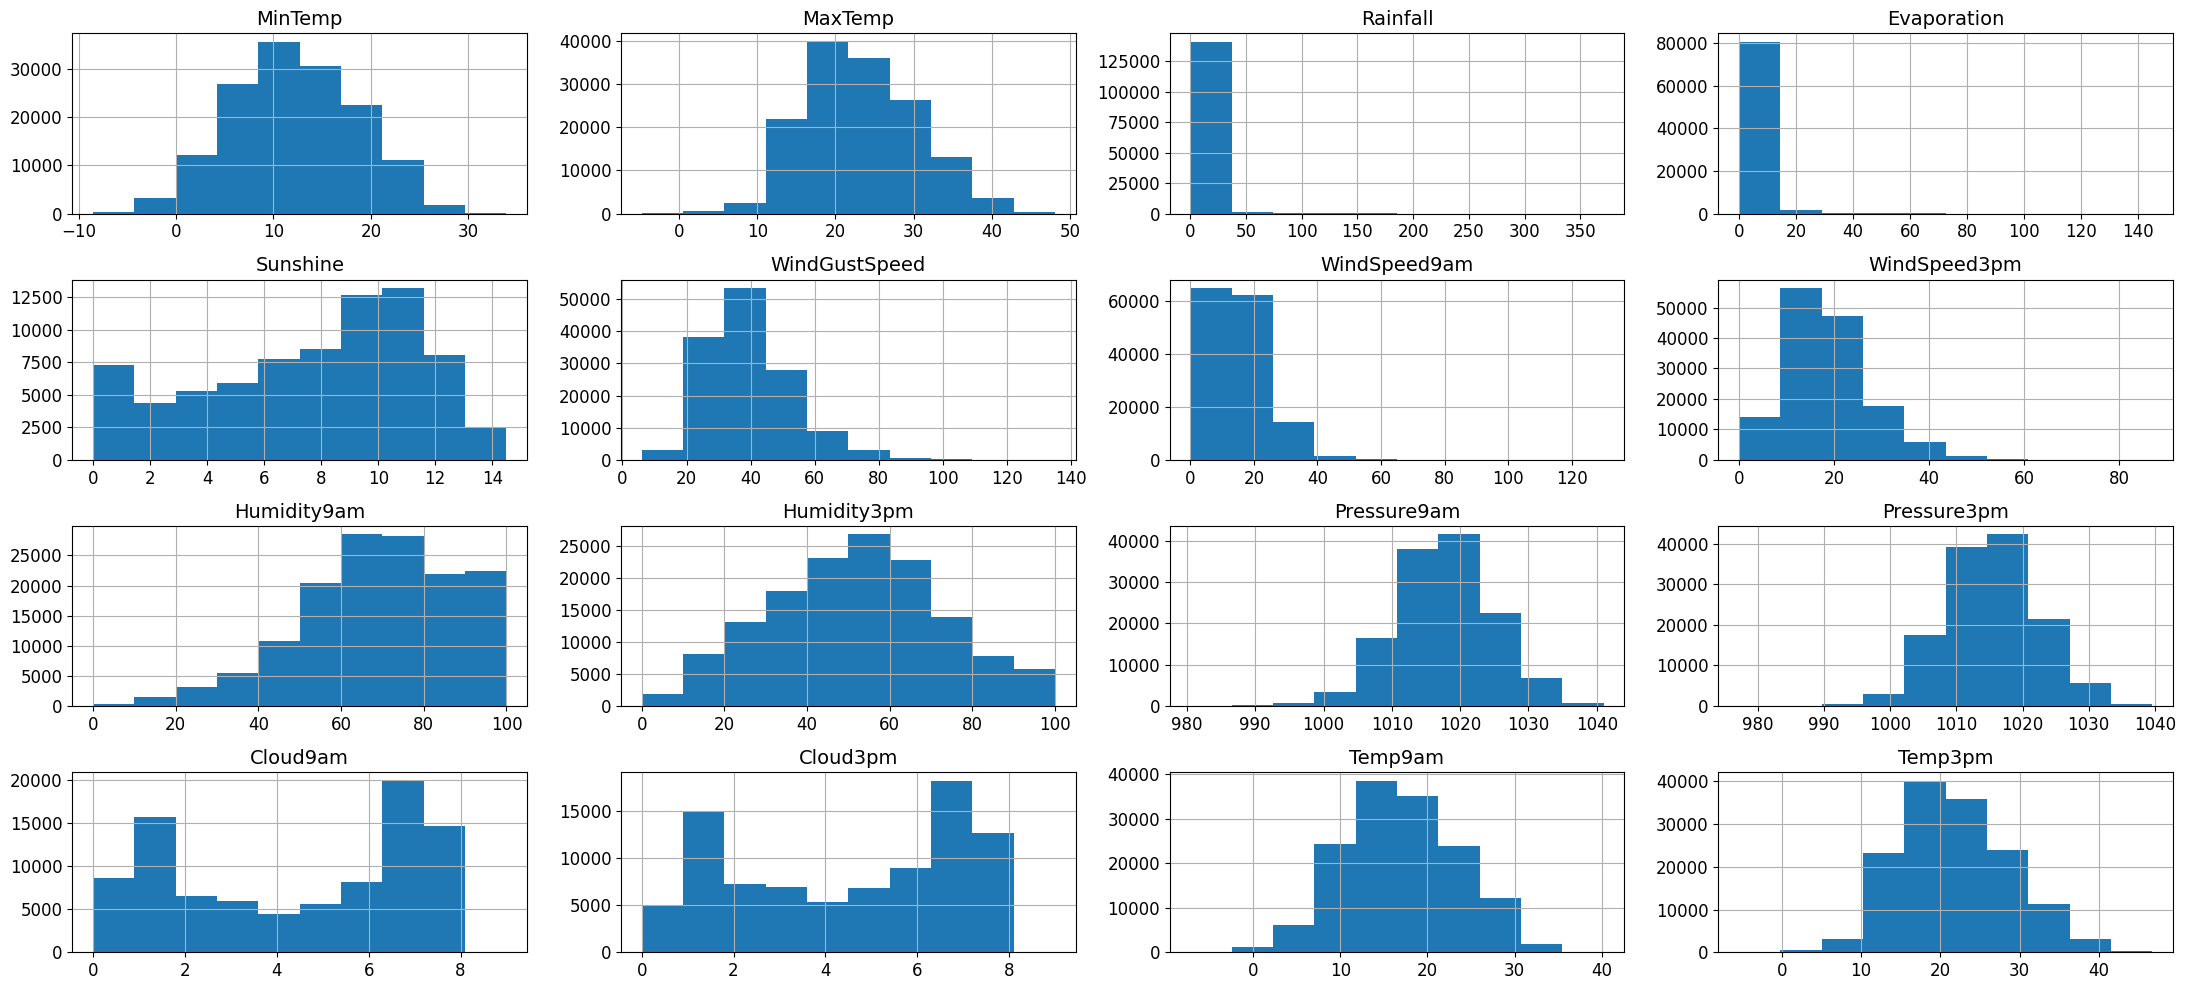

In [7]:
fig = australian_weather_data.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
[x.title.set_size(14) for x in fig.ravel()]
plt.tight_layout()
plt.show()

In [8]:
def plot_features_distribution(df,cols_to_plot):
  nrows = len(cols_to_plot)
  ncols = len(cols_to_plot[0])
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 6))
  for x, rows in enumerate(cols_to_plot):
    for y, column in enumerate(rows):
      df[column].plot.density(color='green', ax=axes[x,y])
      axes[x,y].set_title(column.title(),fontsize='10')

In [9]:
cols_to_plot = [
    [
        "MinTemp","MaxTemp","Rainfall","Evaporation"
    ],
    [
        "Sunshine", "WindGustSpeed", "WindSpeed9am","WindSpeed3pm"
    ],
    [
        "Humidity9am","Humidity3pm","Pressure9am","Pressure3pm"        
    ],
    [
        "Cloud9am","Cloud3pm","Temp9am","Temp3pm"
    ]
  ]

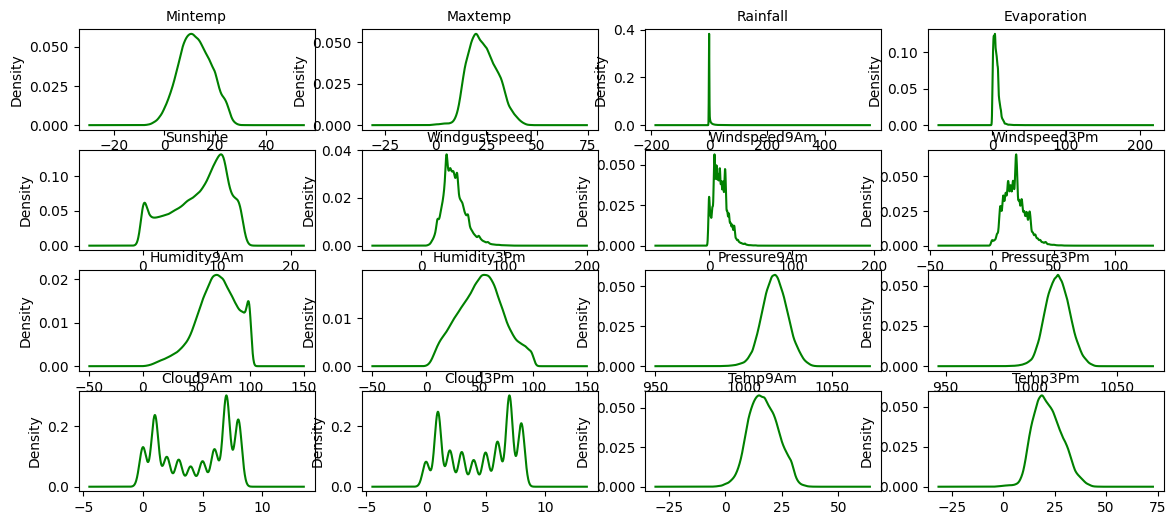

In [10]:
plot_features_distribution(australian_weather_data,cols_to_plot)

Vemos que las siguientes features distribuyen como normal:
- **MinTemp, MaxTemp, Humidity9Am, Humidity3Pm, Pressure9Am, Pressure3Pm, Temp9Am, Temp3Pm**.

Estas otras features no distribuyen como normales:
- **Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9Am, WindSpeed3Pm, Cloud9Am, Cloud3Pm**

### Análisis de variables categóricas (tanto features como target)

In [11]:
australian_weather_data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [12]:
australian_weather_data.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [13]:
australian_weather_data.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [14]:
australian_weather_data.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [15]:
australian_weather_data.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
australian_weather_data.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
# Resumiendo
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for col in cat_features:
    print('Feature: ', col, ', Number of categories: ', australian_weather_data[col].nunique())

Feature:  Location , Number of categories:  49
Feature:  WindGustDir , Number of categories:  16
Feature:  WindDir9am , Number of categories:  16
Feature:  WindDir3pm , Number of categories:  16
Feature:  RainToday , Number of categories:  2
Feature:  RainTomorrow , Number of categories:  2


Veamos su (des)balance

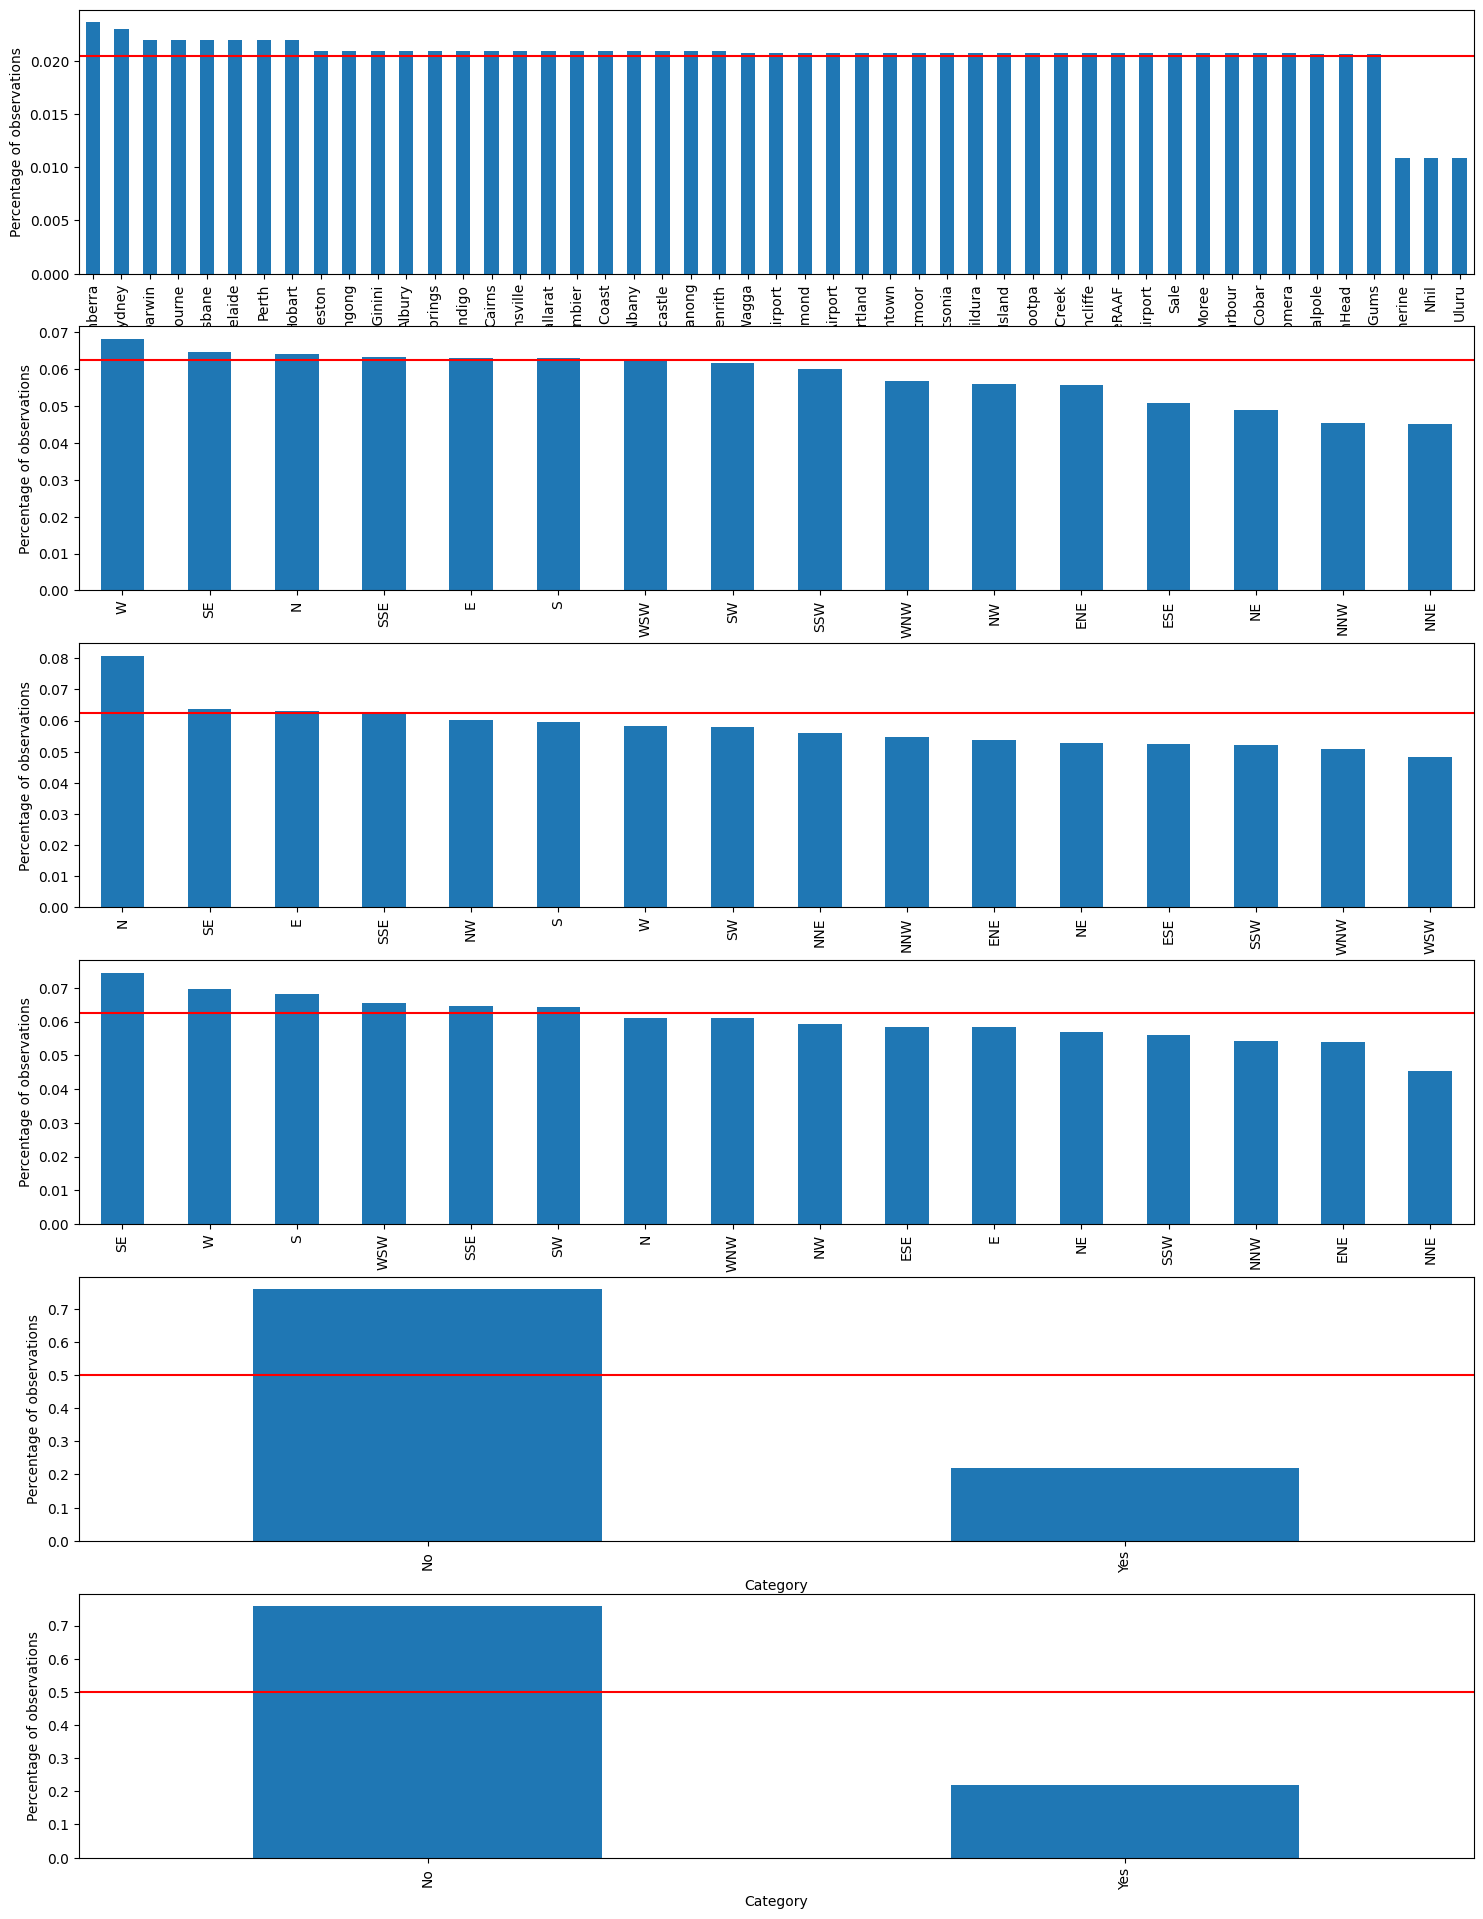

In [18]:
rows = len(australian_weather_data)

fig,axes = plt.subplots(len(cat_features),1,figsize=(18,len(cat_features)*4))
for i,col in enumerate(cat_features):
    frequencies = pd.Series(australian_weather_data[col].value_counts() / rows)
    frequencies.sort_values(ascending=False).plot.bar(ax=axes[i])
    axes[i].set_xlabel(col)
    hline = 1/ (australian_weather_data[col].nunique())
    axes[i].axhline(y=hline, color='red')
    axes[i].set_ylabel('Percentage of observations')
    axes[i].set_xlabel('Category')
plt.show()

Vemos que los datos están bastante balanceados.<br>
En cuanto a las variables **RainToday** y **RainTomorrow**, no presentan distinto orden de magnitud.

In [19]:
australian_weather_data.RainToday.value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [20]:
australian_weather_data.RainTomorrow.value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

### Análisis de features compuestas

In [21]:
australian_weather_data.Date.nunique()

3436

In [22]:
australian_weather_data.groupby(['Date'])['Date'].count()

Date
2007-11-01     1
2007-11-02     1
2007-11-03     1
2007-11-04     1
2007-11-05     1
              ..
2017-06-21    49
2017-06-22    49
2017-06-23    49
2017-06-24    49
2017-06-25    48
Name: Date, Length: 3436, dtype: int64

Tenemos más de 3000 valores distintos para la variable compuesta fecha/hora. Considermos transformar esta variable **mapeándola con el mes correspondiente (01,02,...,12)**. De esta manera, la convertimos en una variable categórica y podemos utilizarla, previa codificación, como feature de nuestro modelo.

## 3.1 Limpieza y preparación de datos

### Análisis de valores nulos

In [23]:
australian_weather_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [24]:
df = australian_weather_data.copy()

% Nulos por columna

In [25]:
{df.columns[i]:round(sum(df.iloc[:,i].isnull())/len(df)*100,2) for i in range(len(df.columns))}

{'Date': 0.0,
 'Location': 0.0,
 'MinTemp': 1.02,
 'MaxTemp': 0.87,
 'Rainfall': 2.24,
 'Evaporation': 43.17,
 'Sunshine': 48.01,
 'WindGustDir': 7.1,
 'WindGustSpeed': 7.06,
 'WindDir9am': 7.26,
 'WindDir3pm': 2.91,
 'WindSpeed9am': 1.21,
 'WindSpeed3pm': 2.11,
 'Humidity9am': 1.82,
 'Humidity3pm': 3.1,
 'Pressure9am': 10.36,
 'Pressure3pm': 10.33,
 'Cloud9am': 38.42,
 'Cloud3pm': 40.81,
 'Temp9am': 1.21,
 'Temp3pm': 2.48,
 'RainToday': 2.24,
 'RainTomorrow': 2.25}

Primero intento imputar valores nulos de RainTomorrow con el valor de **RainToday**. Se trata de valores nulos del tipo **Missing Not At Random (MNAR)**. Se probó bajar los nulos de **RainToday** con **Rainfall** y no se redujo el porcentaje de nulos.

In [26]:
#df['Date'] = pd.to_datetime(df['Date'])
df['RainTomorrow'].fillna(df['RainToday'].shift(1), inplace=True)

El porcentaje de nulos en **RainTomorrow** bajó a menos del 1%.

In [27]:
{df.columns[i]:round(sum(df.iloc[:,i].isnull())/len(df)*100,2) for i in range(len(df.columns))}

{'Date': 0.0,
 'Location': 0.0,
 'MinTemp': 1.02,
 'MaxTemp': 0.87,
 'Rainfall': 2.24,
 'Evaporation': 43.17,
 'Sunshine': 48.01,
 'WindGustDir': 7.1,
 'WindGustSpeed': 7.06,
 'WindDir9am': 7.26,
 'WindDir3pm': 2.91,
 'WindSpeed9am': 1.21,
 'WindSpeed3pm': 2.11,
 'Humidity9am': 1.82,
 'Humidity3pm': 3.1,
 'Pressure9am': 10.36,
 'Pressure3pm': 10.33,
 'Cloud9am': 38.42,
 'Cloud3pm': 40.81,
 'Temp9am': 1.21,
 'Temp3pm': 2.48,
 'RainToday': 2.24,
 'RainTomorrow': 0.86}

Observemos la relación entre los datos faltantes con el equipamiento de la estación metereológica<br>
Porcentaje de nulos para cada variable en cada ciudad.<br>

In [28]:
aux = list(df.columns)
aux.remove('Location')

In [29]:
# Primera mitad de las variables
porcentaje_nulos = df.groupby('Location')[aux].apply(lambda x: round(x.isnull().sum() / len(x),4) * 100).reset_index()
porcentaje_nulos.iloc[:,:int(len(aux)/2)].head(5)

,Location,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm
0,Adelaide,0.0,0.06,0.09,3.19,46.63,44.60,0.81,0.81,8.58,0.50
1,Albany,0.0,2.07,1.78,0.79,9.54,17.11,100.00,100.00,8.12,25.76
2,Albury,0.0,0.36,0.36,0.95,100.00,100.00,1.05,1.05,17.27,1.51
3,AliceSprings,0.0,0.03,0.07,0.26,7.07,17.11,1.68,1.68,7.57,0.13
4,BadgerysCreek,0.0,1.20,0.96,2.69,100.00,100.00,2.53,2.53,14.46,2.82


In [30]:
# Variables restantes
df.groupby('Location')[aux[int(len(aux)/2):]].\
    apply(lambda x: round(x.isnull().sum() / len(x),4) * 100).reset_index().head(5)

,Location,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Adelaide,0.16,0.16,0.16,0.25,0.22,100.00,100.00,0.16,0.13,3.19,0.13
1,Albany,24.11,1.61,23.55,0.82,0.82,1.25,23.39,1.28,23.42,0.79,0.07
2,Albury,0.36,0.30,0.26,0.16,0.26,57.60,53.06,0.30,0.26,0.95,0.20
3,AliceSprings,0.07,0.10,0.16,0.03,0.10,10.99,11.88,0.00,0.07,0.26,0.03
4,BadgerysCreek,1.60,1.79,1.83,5.58,5.75,100.00,100.00,1.36,1.46,2.69,0.66


Hay varias estaciones con valores faltantes para variables completas. Esto se explica por la ausencia de equipamiento de medición en condiciones operativas.

A modo de ejemplo, la ausencia de valores de evaporación seguramente corresponde a la falta de un tanque clase A:
https://www.hyquestsolutions.com.au/fileadmin/user_upload/Class_A_Evaporation_Pan_en.pdf

Se prueba eliminar los lugares con equipamiento faltante y evaluar nuevamente el porcentaje de nulos

In [31]:
porcentaje_nulos[~(porcentaje_nulos == 100).any(axis=1)].reset_index().head(5)

,index,Location,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3,AliceSprings,0.0,0.03,0.07,0.26,7.07,17.11,1.68,1.68,...,0.10,0.16,0.03,0.10,10.99,11.88,0.00,0.07,0.26,0.03
1,7,Brisbane,0.0,0.28,0.44,1.00,0.60,1.53,1.28,1.28,...,0.13,0.47,0.03,0.25,0.03,0.06,0.13,0.47,1.00,0.03
2,8,Cairns,0.0,0.03,0.00,1.71,12.17,15.66,0.62,0.59,...,0.03,0.00,0.03,0.00,6.81,7.57,0.03,0.00,1.71,0.66
3,9,Canberra,0.0,0.17,0.09,0.52,46.68,55.73,9.87,9.81,...,1.83,0.35,6.58,6.43,31.20,36.76,0.52,0.20,0.52,0.03
4,10,Cobar,0.0,0.20,0.10,0.70,11.40,81.72,1.40,1.40,...,4.15,4.15,1.00,0.86,12.63,10.24,0.27,0.23,0.70,0.23


Tras eliminar (momentáneamente) las locaciones con equipamiento faltante, se observa que las variables **Evaporation**, **Sunshine**, **Cloud9am** y **Cloud3pm** aún mantienen una elevada proporción de nulos. Por ello se propone eliminarlas completamente. En algunas locaciones también se observa la falta de equipamiento para medir presión y viento, pero dado el bajo porcentaje de nulos totales que tienen esas variables se propone imputar los valores faltantes según una metodología acorde.

In [32]:
# Elimino las variables mencionadas
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [33]:
# Recordemos el porcentaje de nulos totales
{df.columns[i]:round(sum(df.iloc[:,i].isnull())/len(df)*100,2) for i in range(len(df.columns))}

{'Date': 0.0,
 'Location': 0.0,
 'MinTemp': 1.02,
 'MaxTemp': 0.87,
 'Rainfall': 2.24,
 'WindGustDir': 7.1,
 'WindGustSpeed': 7.06,
 'WindDir9am': 7.26,
 'WindDir3pm': 2.91,
 'WindSpeed9am': 1.21,
 'WindSpeed3pm': 2.11,
 'Humidity9am': 1.82,
 'Humidity3pm': 3.1,
 'Pressure9am': 10.36,
 'Pressure3pm': 10.33,
 'Temp9am': 1.21,
 'Temp3pm': 2.48,
 'RainToday': 2.24,
 'RainTomorrow': 0.86}


En las estaciones con los valores de viento y presión faltante, el faltante es del tipo *Missing Not At Random* (MNAR). En las restantes estaciones esas mismas variables tienen nulos completamente aleatorios *Missing Completely At Random* (MCAR). Se tratará cada caso en particular.

Entre las variables a imputar valores faltantes, se encuentran las variables categóricas referentes al viento. Debido a que los datos faltantes son aproximadamente el 7%, se propone imputar los valores faltantes con una nueva categoría "FALTANTE" sin que eso genere una categoría poco frecuente.

Para la variable de intensidad máxima de viento, el porcentaje de faltantes se encuentra en el entorno del 7%, valor mayor al 5% límite recomendado para la imputación por media o moda. Se propone tratar la totalidad de los valores nulos como *Missing At Random* (MAR), crear una columna indicando valor faltante e imputar con la mediana debido a que las distribución tienen una marcada oblicuidad.

Para las variables de presión, el porcentaje total de nulos es de aproximadamente un 10% y la cantidad de nulos no aleatorios se encuentra en el entorno del 1%. Se propone agregar una columna indicando los datos faltante y tratar la totalidad de los valores nulos como MAR e imputar con la mediana debido a que las distribuciones tienen una marcada oblicuidad.


In [34]:
# Los lugares y valores faltantes son
porcentaje_nulos = porcentaje_nulos.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
porcentaje_nulos[(porcentaje_nulos == 100).any(axis=1)][['Location','WindGustDir', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm']]

,Location,WindGustDir,WindGustSpeed,Pressure9am,Pressure3pm
1,Albany,100.00,100.00,0.82,0.82
23,MountGinini,10.49,10.49,100.00,100.00
24,Newcastle,100.00,100.00,100.00,100.00
30,Penrith,2.14,2.14,100.00,100.00
36,SalmonGums,2.80,2.80,100.00,100.00


**Reemplazo los valores categóricos mencionados**

In [35]:
df['WindGustDir'].fillna('NA', inplace=True)
df['WindDir9am'].fillna('NA', inplace=True)
df['WindDir3pm'].fillna('NA', inplace=True)
{df.columns[i]:round(sum(df.iloc[:,i].isnull())/len(df)*100,2) for i in range(len(df.columns))}

{'Date': 0.0,
 'Location': 0.0,
 'MinTemp': 1.02,
 'MaxTemp': 0.87,
 'Rainfall': 2.24,
 'WindGustDir': 0.0,
 'WindGustSpeed': 7.06,
 'WindDir9am': 0.0,
 'WindDir3pm': 0.0,
 'WindSpeed9am': 1.21,
 'WindSpeed3pm': 2.11,
 'Humidity9am': 1.82,
 'Humidity3pm': 3.1,
 'Pressure9am': 10.36,
 'Pressure3pm': 10.33,
 'Temp9am': 1.21,
 'Temp3pm': 2.48,
 'RainToday': 2.24,
 'RainTomorrow': 0.86}

**Imputo con la mediana las variables con marcada oblicuidad.**

In [36]:
X = df[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]

imputer = SimpleImputer(strategy='median',add_indicator=True)
X_imputed_median = imputer.fit_transform(X)

# Nuevo dataframe con X e indicadores de valores imputados
X_cols = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
X_cols = X_cols+["%s_imputed" % x for x in X_cols]
X_imputed_median = pd.DataFrame(X_imputed_median,columns=X_cols)

assert(not np.any(X_imputed_median.isnull().sum()>0))
X_imputed_median.head()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm,WindGustSpeed_imputed,WindSpeed9am_imputed,WindSpeed3pm_imputed
0,44.0,20.0,24.0,0.0,0.0,0.0
1,44.0,4.0,22.0,0.0,0.0,0.0
2,46.0,19.0,26.0,0.0,0.0,0.0
3,24.0,11.0,9.0,0.0,0.0,0.0
4,41.0,7.0,20.0,0.0,0.0,0.0


**Imputo con la media el resto de las variables numéricas**

In [37]:
X_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
          'Pressure3pm', 'Temp9am', 'Temp3pm']
X = df[X_cols]

imputer = SimpleImputer(strategy='mean',add_indicator=True)
X_imputed_mean = imputer.fit_transform(X)

# Nuevo dataframe con X e indicadores de valores imputados
X_cols = X_cols + ["%s_imputed" % x for x in X_cols]
X_imputed_mean = pd.DataFrame(X_imputed_mean,columns=X_cols)

assert(not np.any(X_imputed_mean.isnull().sum()>0))
X_imputed_mean.head()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,MinTemp_imputed,MaxTemp_imputed,Rainfall_imputed,Humidity9am_imputed,Humidity3pm_imputed,Pressure9am_imputed,Pressure3pm_imputed,Temp9am_imputed,Temp3pm_imputed
0,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Unificación de subsets

In [38]:
df_imputed = pd.merge(X_imputed_mean, X_imputed_median, left_index=True, right_index=True)
df_imputed[['Location', 'Date', 'RainToday', 'RainTomorrow', 'WindGustDir','WindDir9am','WindDir3pm']] = df[['Location', 'Date', 'RainToday', 'RainTomorrow', 'WindGustDir','WindDir9am','WindDir3pm']]
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MinTemp                145460 non-null  float64
 1   MaxTemp                145460 non-null  float64
 2   Rainfall               145460 non-null  float64
 3   Humidity9am            145460 non-null  float64
 4   Humidity3pm            145460 non-null  float64
 5   Pressure9am            145460 non-null  float64
 6   Pressure3pm            145460 non-null  float64
 7   Temp9am                145460 non-null  float64
 8   Temp3pm                145460 non-null  float64
 9   MinTemp_imputed        145460 non-null  float64
 10  MaxTemp_imputed        145460 non-null  float64
 11  Rainfall_imputed       145460 non-null  float64
 12  Humidity9am_imputed    145460 non-null  float64
 13  Humidity3pm_imputed    145460 non-null  float64
 14  Pressure9am_imputed    145460 non-nu

### Encoding

_Definimos un par de funciones utilitarias para corregir nombres de ciudades y obtener coordenadas:_

In [39]:
def separate_names(name):
    separated_name = re.sub(r"([a-z])([A-Z])", r"\1 \2", name)
    return separated_name

In [40]:
def get_city_coordinates(city_name, username):
    base_url = "http://api.geonames.org/searchJSON"
    params = {
        "q": city_name,
        "country": "AU",  
        "maxRows": 1,     
        "username": username  
    }
    response = requests.get(base_url, params=params)
    data = response.json()

    if "geonames" in data and data["geonames"]:
        city_data = data["geonames"][0]
        latitude = city_data["lat"]
        longitude = city_data["lng"]
        return latitude, longitude
    else:
        return None, None

**Transformación del viento**

In [41]:
# Ángulos en radianes
direcciones_rad = {'E':0, 'ENE':np.pi*1/8, 'NE':np.pi*2/8, 'NNE':np.pi*3/8, 
                   'N':np.pi*4/8, 'NNW':np.pi*5/8, 'NW':np.pi*6/8, 'WNW':np.pi*7/8, 
                   'W':np.pi*8/8, 'WSW':np.pi*9/8, 'SW':np.pi*10/8, 'SSW':np.pi*11/8, 
                   'S':np.pi*12/8, 'SSE':np.pi*13/8, 'SE':np.pi*14/8, 'ESE':np.pi*15/8}
direcciones_rad

{'E': 0,
 'ENE': 0.39269908169872414,
 'NE': 0.7853981633974483,
 'NNE': 1.1780972450961724,
 'N': 1.5707963267948966,
 'NNW': 1.9634954084936207,
 'NW': 2.356194490192345,
 'WNW': 2.748893571891069,
 'W': 3.141592653589793,
 'WSW': 3.5342917352885173,
 'SW': 3.9269908169872414,
 'SSW': 4.319689898685965,
 'S': 4.71238898038469,
 'SSE': 5.105088062083414,
 'SE': 5.497787143782138,
 'ESE': 5.890486225480862}

In [42]:
df2 = df.dropna()
df2['angulo_WindGustDir'] = df2['WindGustDir'].map(lambda x: direcciones_rad.get(x, None))
df2['x_WindGustDir'] = df2['angulo_WindGustDir'].map(lambda x: np.cos(x))
df2['y_WindGustDir'] = df2['angulo_WindGustDir'].map(lambda y: np.cos(y))
df2['y_WindGustDir']

locaciones = df['Location'].unique()

In [43]:
locaciones

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

En función del estudio inicial de las variables que se hizo en la sección anterior, elegiremos una
técnica de codificación para cada variable.

In [44]:
df2.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,angulo_WindGustDir,x_WindGustDir,y_WindGustDir
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,3.141593,-1.000000,-1.000000
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2.748894,-0.923880,-0.923880
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,3.534292,-0.923880,-0.923880
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,0.785398,0.707107,0.707107
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,3.141593,-1.000000,-1.000000


In [45]:
df2.dtypes

Date                   object
Location               object
MinTemp               float64
MaxTemp               float64
Rainfall              float64
WindGustDir            object
WindGustSpeed         float64
WindDir9am             object
WindDir3pm             object
WindSpeed9am          float64
WindSpeed3pm          float64
Humidity9am           float64
Humidity3pm           float64
Pressure9am           float64
Pressure3pm           float64
Temp9am               float64
Temp3pm               float64
RainToday              object
RainTomorrow           object
angulo_WindGustDir    float64
x_WindGustDir         float64
y_WindGustDir         float64
dtype: object

- **RainToday**: Es una variable con dos categorias posibles.
    - Técnicas de encoding propuestas:
        1. One Hot encoding k-1

- **Location**: Esta variable tiene una cardinalidad alta (49 categorias). Por lo tanto, lo ideal sería optar por una técnica de codificación que no aumente considerablemente la dimensionalidad. 
Por otro lado, el problema consiste en una clasificación binaria. Por ejemplo, se podría utilizar un modelo de regresión logística. Entonces la técnica de codificacióna probar tiene que ser compatible con esto. 
    - Técnicas de encoding propuestas:
        1. Binary encoding

In [46]:
# One Hot Encoder
ohe = OneHotEncoder(categories='auto',drop='first', sparse_output=False)
ohe.fit(df2[['RainToday']].fillna('NA'))

OneHotEncoder(drop='first', sparse_output=False)

In [47]:
ohe.categories_

[array(['No', 'Yes'], dtype=object)]

In [48]:
# Binary Encoder
BiEncoder = BinaryEncoder(cols=['Location'])
location_encoded = BiEncoder.fit_transform(df2['Location'])

In [49]:
location_encoded

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
145454,1,0,1,1,0,0
145455,1,0,1,1,0,0
145456,1,0,1,1,0,0
145457,1,0,1,1,0,0


In [50]:
df_encoded1 = pd.merge(df2, location_encoded, left_index=True, right_index=True)

In [51]:
df_encoded1['Date_Month'] = df_encoded1.Date.str.slice(start=5,stop=7)

In [52]:
df_encoded1.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,angulo_WindGustDir,x_WindGustDir,y_WindGustDir,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Date_Month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,3.141593,-1.000000,-1.000000,0,0,0,0,0,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,2.748894,-0.923880,-0.923880,0,0,0,0,0,1,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,3.534292,-0.923880,-0.923880,0,0,0,0,0,1,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,0.785398,0.707107,0.707107,0,0,0,0,0,1,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,3.141593,-1.000000,-1.000000,0,0,0,0,0,1,12


In [53]:
cols = ['Date_Month','RainToday','RainTomorrow']
df_encoded2 = pd.DataFrame(df_encoded1, columns=cols)
df_encoded2 = pd.get_dummies(df_encoded2)
df_encoded2 = df_encoded2.rename(columns={"RainToday_Yes": "RainToday", "RainTomorrow_Yes": "RainTomorrow"})
df_encoded2 = df_encoded2.drop(['RainToday_No','RainTomorrow_No'],axis=1)
df_encoded1 = df_encoded1.drop(['RainToday','RainTomorrow'],axis=1)
df_encoded = pd.merge(df_encoded1, df_encoded2, left_index=True, right_index=True)

In [54]:
df_encoded.head(5).columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'angulo_WindGustDir',
       'x_WindGustDir', 'y_WindGustDir', 'Location_0', 'Location_1',
       'Location_2', 'Location_3', 'Location_4', 'Location_5', 'Date_Month',
       'Date_Month_01', 'Date_Month_02', 'Date_Month_03', 'Date_Month_04',
       'Date_Month_05', 'Date_Month_06', 'Date_Month_07', 'Date_Month_08',
       'Date_Month_09', 'Date_Month_10', 'Date_Month_11', 'Date_Month_12',
       'RainToday', 'RainTomorrow'],
      dtype='object')

## 3.2 Ingeniería de features

Vamos a comenzar limpiando un poco el dataset resultante de los pasos anteriores

In [55]:
df_encoded = df_encoded[
    [
        'MinTemp', 'MaxTemp', 'Rainfall','angulo_WindGustDir','WindGustSpeed','WindSpeed9am',
        'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
        'Pressure3pm', 'Temp9am', 'Temp3pm', 'WindDir9am','WindDir3pm',
        'Location_0', 'Location_1','Location_2', 'Location_3', 'Location_4', 'Location_5',
        'Date_Month_01','Date_Month_02', 'Date_Month_03', 'Date_Month_04','Date_Month_05', 
        'Date_Month_06', 'Date_Month_07', 'Date_Month_08','Date_Month_09', 'Date_Month_10', 
        'Date_Month_11', 'Date_Month_12','RainToday', 'RainTomorrow'        
    ]
]

df_encoded = df_encoded.rename(columns={'angulo_WindGustDir':'WindGustDirAngle'})

In [56]:
df_encoded.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustDirAngle,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Date_Month_05,Date_Month_06,Date_Month_07,Date_Month_08,Date_Month_09,Date_Month_10,Date_Month_11,Date_Month_12,RainToday,RainTomorrow
0,13.4,22.9,0.6,3.141593,44.0,20.0,24.0,71.0,22.0,1007.7,...,False,False,False,False,False,False,False,True,False,False
1,7.4,25.1,0.0,2.748894,44.0,4.0,22.0,44.0,25.0,1010.6,...,False,False,False,False,False,False,False,True,False,False
2,12.9,25.7,0.0,3.534292,46.0,19.0,26.0,38.0,30.0,1007.6,...,False,False,False,False,False,False,False,True,False,False
3,9.2,28.0,0.0,0.785398,24.0,11.0,9.0,45.0,16.0,1017.6,...,False,False,False,False,False,False,False,True,False,False
4,17.5,32.3,1.0,3.141593,41.0,7.0,20.0,82.0,33.0,1010.8,...,False,False,False,False,False,False,False,True,False,False


In [57]:
df_encoded.dtypes

MinTemp             float64
MaxTemp             float64
Rainfall            float64
WindGustDirAngle    float64
WindGustSpeed       float64
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Temp9am             float64
Temp3pm             float64
WindDir9am           object
WindDir3pm           object
Location_0            int64
Location_1            int64
Location_2            int64
Location_3            int64
Location_4            int64
Location_5            int64
Date_Month_01          bool
Date_Month_02          bool
Date_Month_03          bool
Date_Month_04          bool
Date_Month_05          bool
Date_Month_06          bool
Date_Month_07          bool
Date_Month_08          bool
Date_Month_09          bool
Date_Month_10          bool
Date_Month_11          bool
Date_Month_12          bool
RainToday              bool
RainTomorrow           bool
dtype: object

### Análisis de correlaciones

**Analicemos la relación entre las variables numéricas de entrada**

Vamos a analizar la correlacion entre las variables de entrada y elminar aquellas que sean redundantes o dependientes de otras.

Comenzamos analizando la relación entre las variables numéricas. Para eso vamos a utilizar la matriz de correlación utilizando el coeficiente de Spearman, que a diferencia del de Pearson no requiere que las variables tengan una distribución normal.

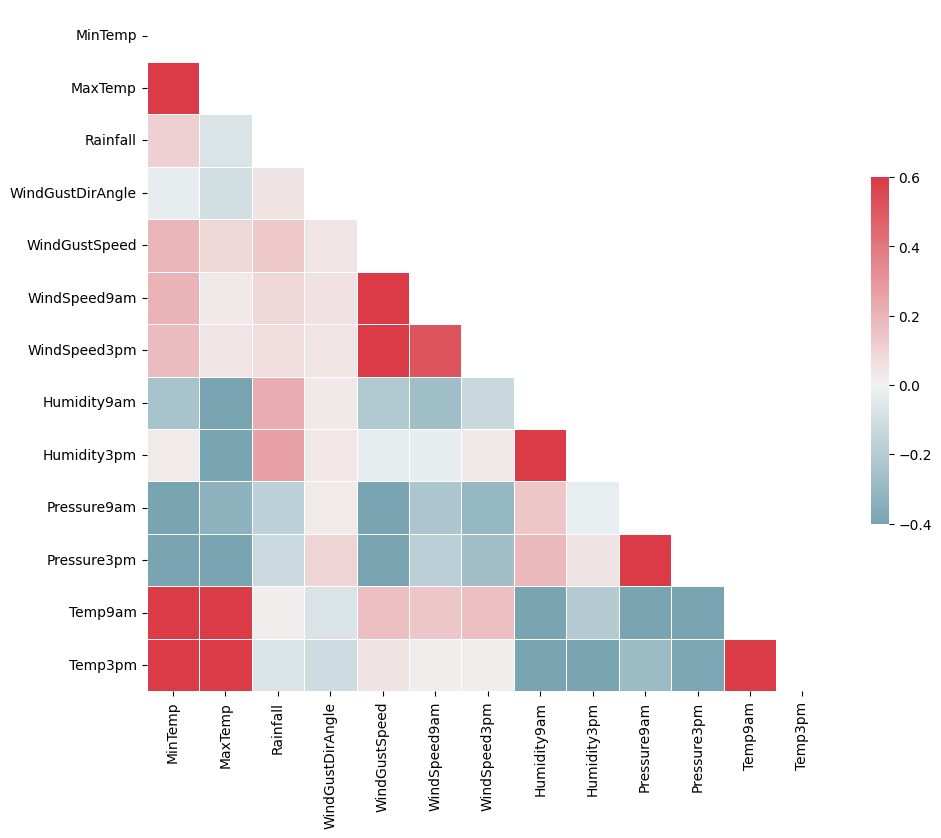

In [58]:
corr_features = ['MinTemp','MaxTemp','Rainfall','WindGustDirAngle','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
corr_data = df_encoded.copy()
corr_data = corr_data.loc[:,corr_features]

corr = corr_data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, axes = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, vmin=-.4, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5});

**Analicemos la relación entre las variables numéricas de entrada y la variable categórica de salida**

Para eso utilizaremos el coeficiente de Kendall

In [59]:
cols = ['MinTemp','MaxTemp','Rainfall','WindGustDirAngle','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTomorrow']

corr_data = df_encoded.copy()
corr_data = corr_data.loc[:,cols]
corr_data = corr_data.replace({'RainTomorrow': {False: 0, True: 1} })
corr = corr_data.corr(method='kendall')

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


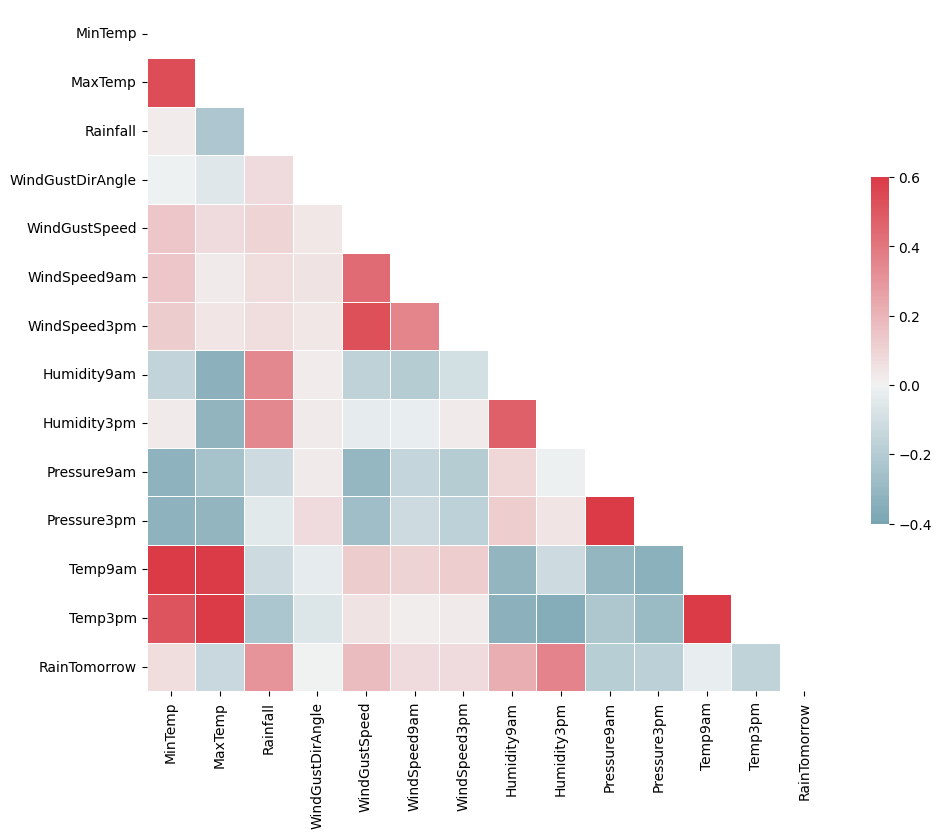

In [60]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, axes = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, vmin=-.4, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5});

Nos interesa ver particularmente la última fila de la matriz: <br>
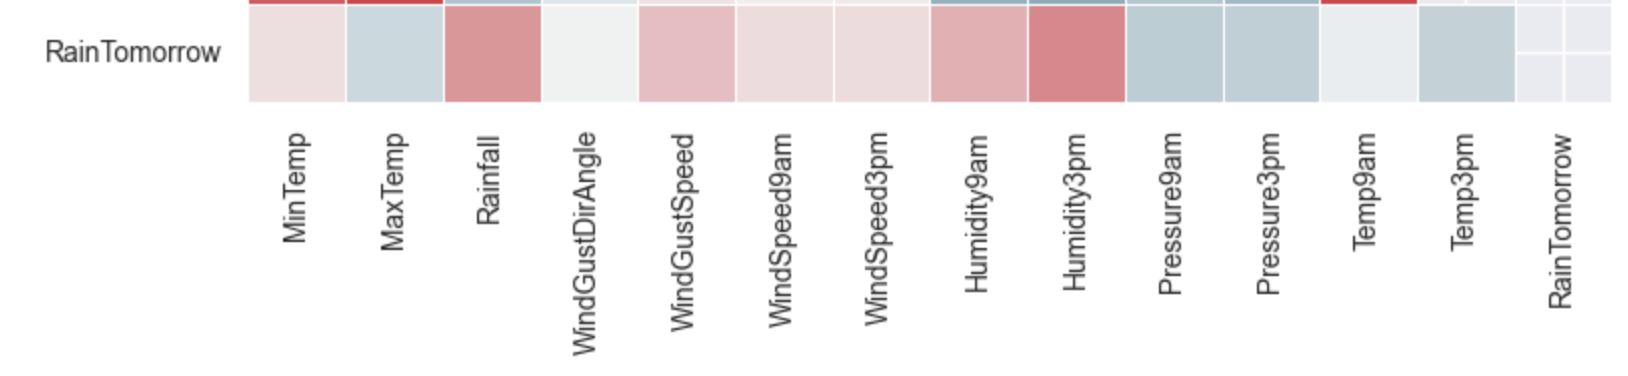

**Analicemos la relación entre las variables categóricas y la variable de salida**

In [61]:
cols = ["Location_0","Location_1","Location_2","Location_3","Location_4",
        "Location_5","Date_Month_01","Date_Month_02","Date_Month_03","Date_Month_04","Date_Month_05",
        "Date_Month_06","Date_Month_07","Date_Month_08","Date_Month_09","Date_Month_10","Date_Month_11",
        "Date_Month_12","RainToday","RainTomorrow"]
cat_data = df_encoded.copy()
cat_data = cat_data.loc[:,cols]
cat_data_x, cat_data_y = \
cat_data[cat_data.columns[:-1]], \
cat_data[cat_data.columns[-1]]
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(cat_data_x, cat_data_y, test_size=0.2, random_state=1)

In [62]:
X_cat_train

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Date_Month_01,Date_Month_02,Date_Month_03,Date_Month_04,Date_Month_05,Date_Month_06,Date_Month_07,Date_Month_08,Date_Month_09,Date_Month_10,Date_Month_11,Date_Month_12,RainToday
87201,0,1,1,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True
144832,1,0,1,1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False
133420,1,0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,True
60815,0,1,0,0,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True
94635,0,1,1,1,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63490,0,1,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,False,False
117501,1,0,0,0,1,1,False,True,False,False,False,False,False,False,False,False,False,False,False
5503,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,True,False
92801,0,1,1,1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False


Luego de codificar las variables, vamos a probar dos métodos: el X<sup>2</sup> y el Criterio de Información Mutua

Comenzamos con **X<sup>2</sup>**

In [63]:
def select_features_chi2(X_train, y_train, X_test,k= 'all'):  
  fs = SelectKBest(score_func=chi2, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

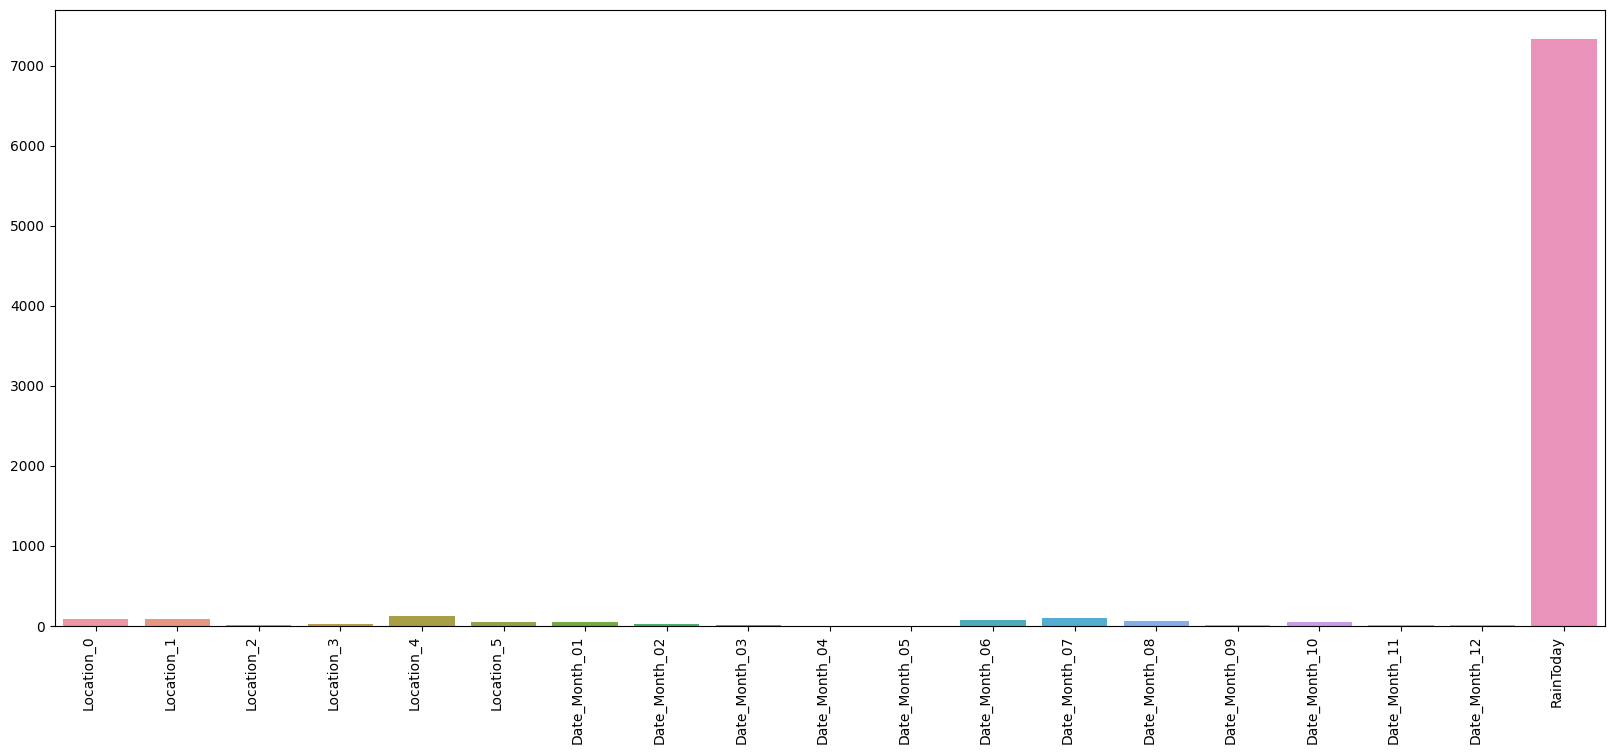

In [64]:
X_train_fs, X_test_fs, fs = select_features_chi2(X_cat_train, y_cat_train, X_cat_test)
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in cat_data.columns[:-1] ], y = fs.scores_,ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Continuamos con el **Criterio de Información Mutua**

In [65]:
def select_features_mutual_info(X_train, y_train, X_test,k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

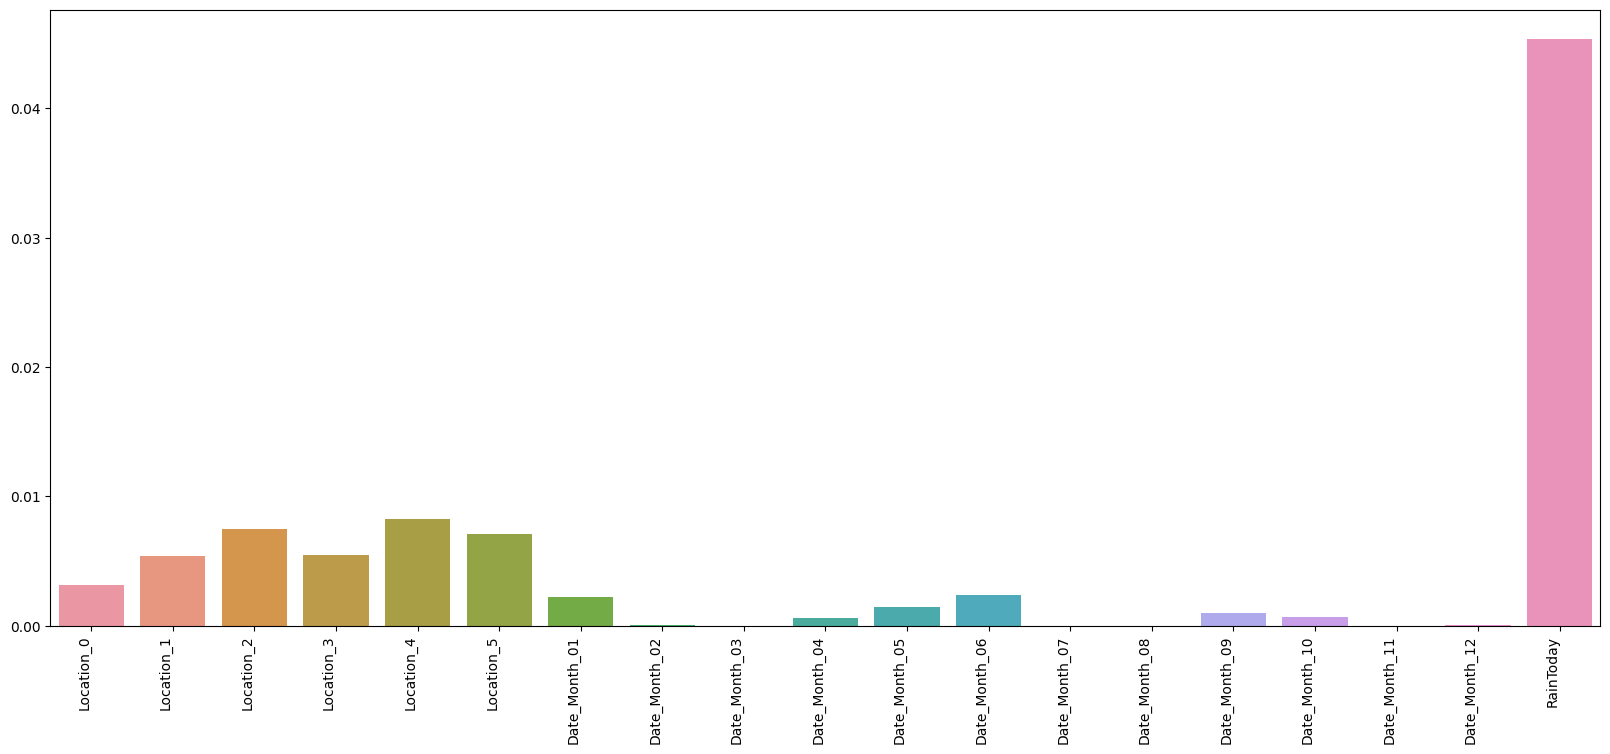

In [66]:
X_train_fs, X_test_fs, fs = select_features_mutual_info(X_cat_train, y_cat_train, X_cat_test)
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in cat_data.columns[:-1] ], y = fs.scores_,ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

En el siguiente análisis se intenta detectar variables que tengan una distribucion distinta para **RainTomorrow** = **True** y **RainTomorrow** = **False**

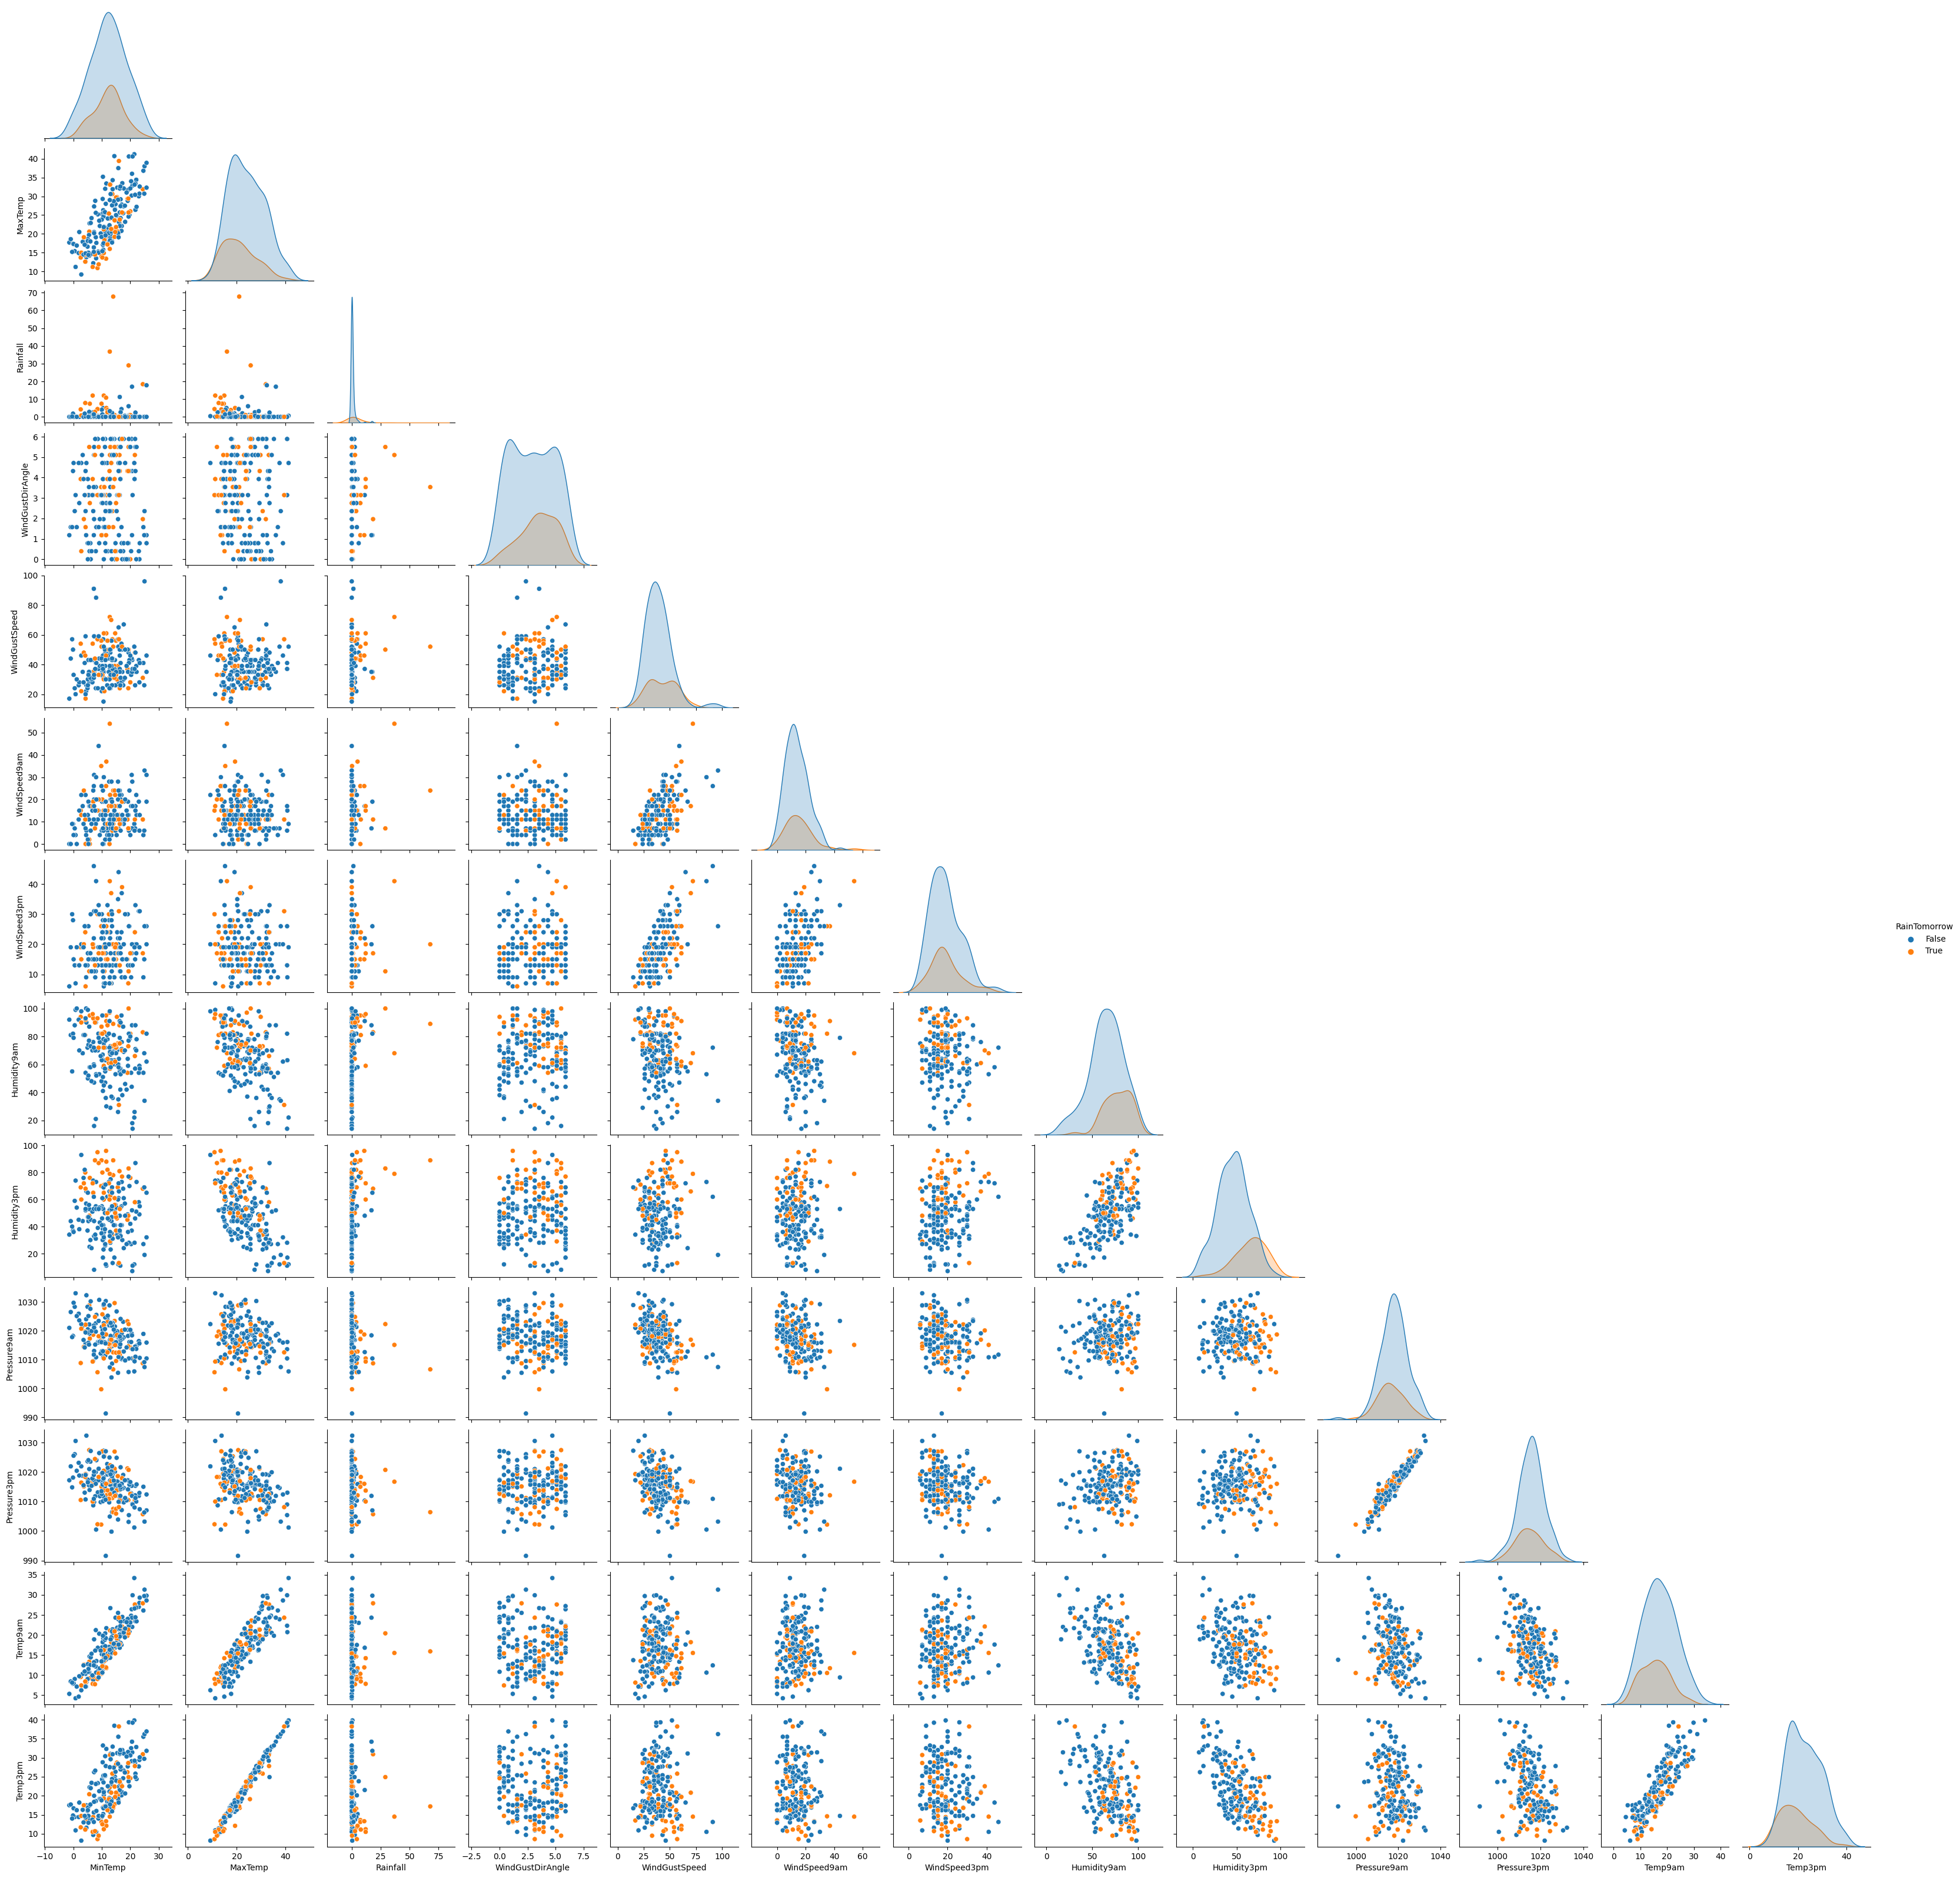

In [67]:
cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDirAngle', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','RainTomorrow'
]

sns.pairplot(df_encoded[cols].sample(200), corner=True, hue='RainTomorrow')
plt.show()

Si las distribuciones son distintas para los dos valores posibles se supone que la variable en cuestión es interesante para el pronóstico de lluvia.

### Selección de features

In [68]:
df_encoded.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDirAngle', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'WindDir9am',
       'WindDir3pm', 'Location_0', 'Location_1', 'Location_2', 'Location_3',
       'Location_4', 'Location_5', 'Date_Month_01', 'Date_Month_02',
       'Date_Month_03', 'Date_Month_04', 'Date_Month_05', 'Date_Month_06',
       'Date_Month_07', 'Date_Month_08', 'Date_Month_09', 'Date_Month_10',
       'Date_Month_11', 'Date_Month_12', 'RainToday', 'RainTomorrow'],
      dtype='object')

En base al análisis, nos quedamos con el siguiente dataset:
- **MinTemp**
- **MaxTemp**
- **Rainfall**
- **WindGustSpeed**
- **Humidity3pm**
- **Pressure9am**
- **Location_0**
- **Location_1**
- **Location_2**
- **Location_3**
- **Location_4**
- **Location_5**
- **RainToday**

Decidimos descartar las siguientes features:
- **WindGustDirAngle**: A pesar de haber transformado la dirección del viento a ángulos (radianes), tiene muy baja correlación con RainTomorrow.
- **WindDir9am, WindDir3pm**: Idem
- **WindSpeed9am**, **WindSpeed3pm**: **WindGustSpeed** correlaciona fuertemente con estas dos, con lo cual optamos por dejar solo esa (velocidad máxima del viento).
- **Pressure3pm**: Ya tenemos a **Pressure9am**, que correlaciona muy fuertemente.
- **Evaporation, Sunshine, Cloud3Am, Cloud3Pm**: Tienen muchísima cantidad de valores nulos.
- **Date_Month_01,Date_Month_02, Date_Month_03, ..., Date_Month_12**: Tiene muy baja correlación con RainTomorrow, según X<sup>2</sup> y MI, y ya estamos incluyendo varias categorías.

In [69]:
df_preprocessed = df_encoded[
    [
        'MinTemp',
        'MaxTemp',
        'Rainfall',
        'WindGustSpeed',
        'Humidity3pm',
        'Pressure9am',
        'Location_0',
        'Location_1',
        'Location_2',
        'Location_3',
        'Location_4',
        'Location_5',
        'RainToday',
        'RainTomorrow'
    ]
]

### Tratamiento de outliers

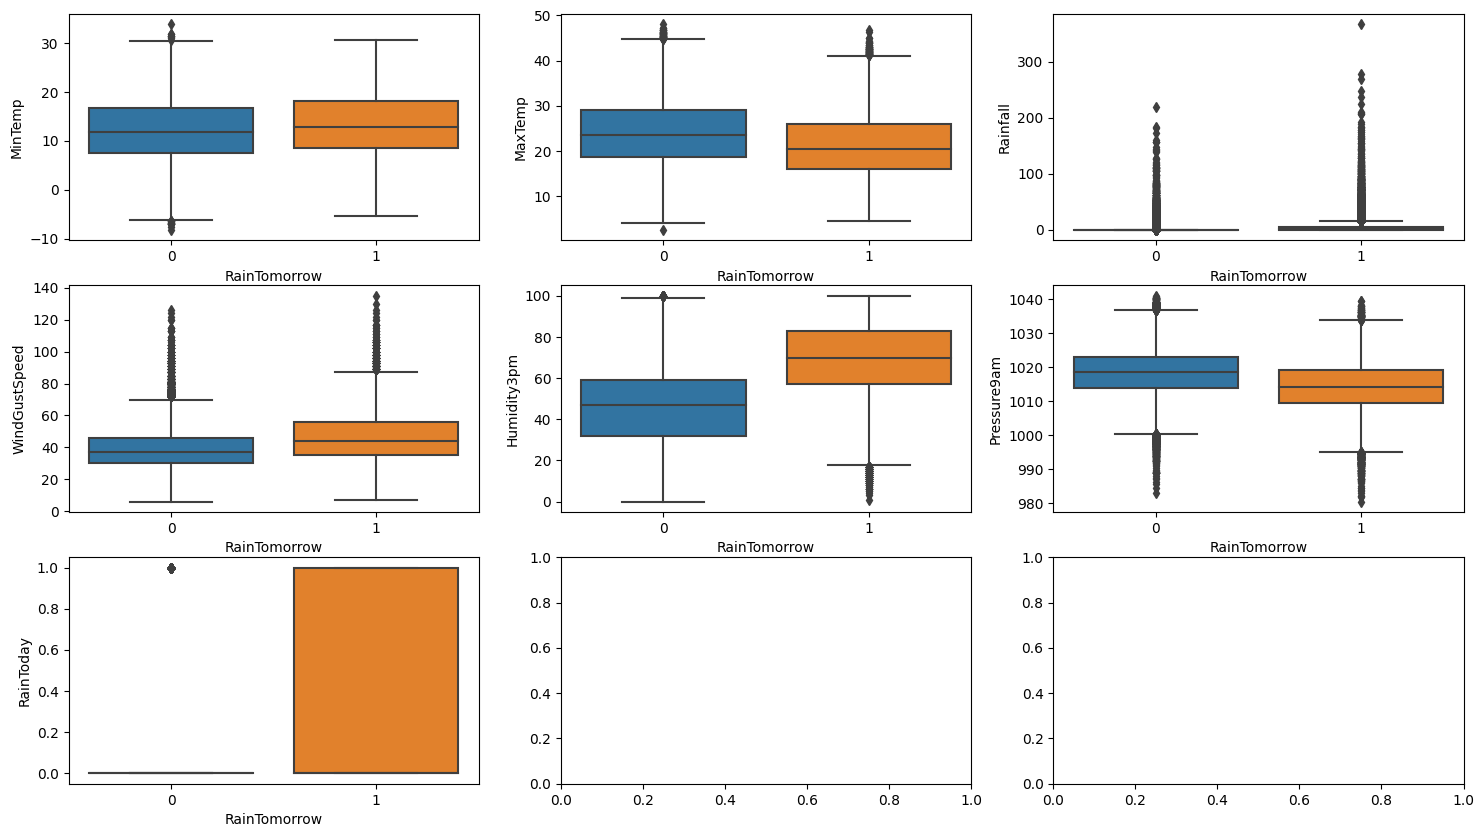

In [70]:
nrows=3
ncols=3

fig,axs = plt.subplots(nrows, ncols, figsize=(18,10))
row = 0
col = 0

features = [
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'WindGustSpeed',
    'Humidity3pm',
    'Pressure9am',
    'RainToday',
]

df_preprocessed = df_preprocessed.replace({'RainToday': {False: 0, True: 1},'RainTomorrow': {False: 0, True: 1} })

for i,feature in enumerate(features):
    sns.boxplot(y=feature, x='RainTomorrow',data=df_preprocessed,  ax=axs[row,col])
    col+=1
    if col==ncols:
        col=0
        row+=1       
    if row==ncols:
        break        
plt.show()

In [71]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Cajas y bigotes')

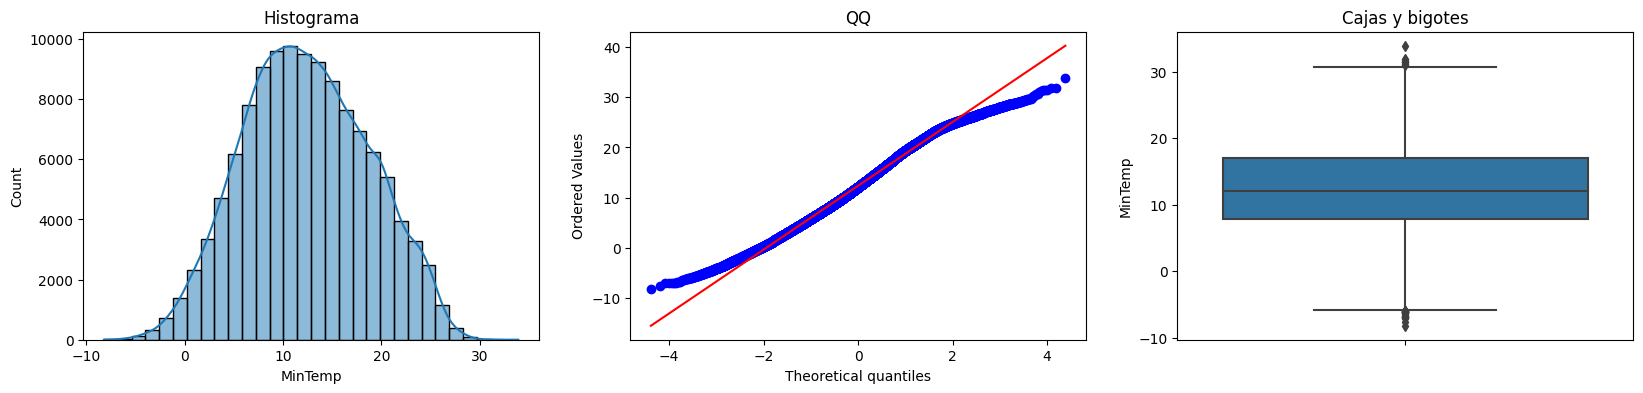

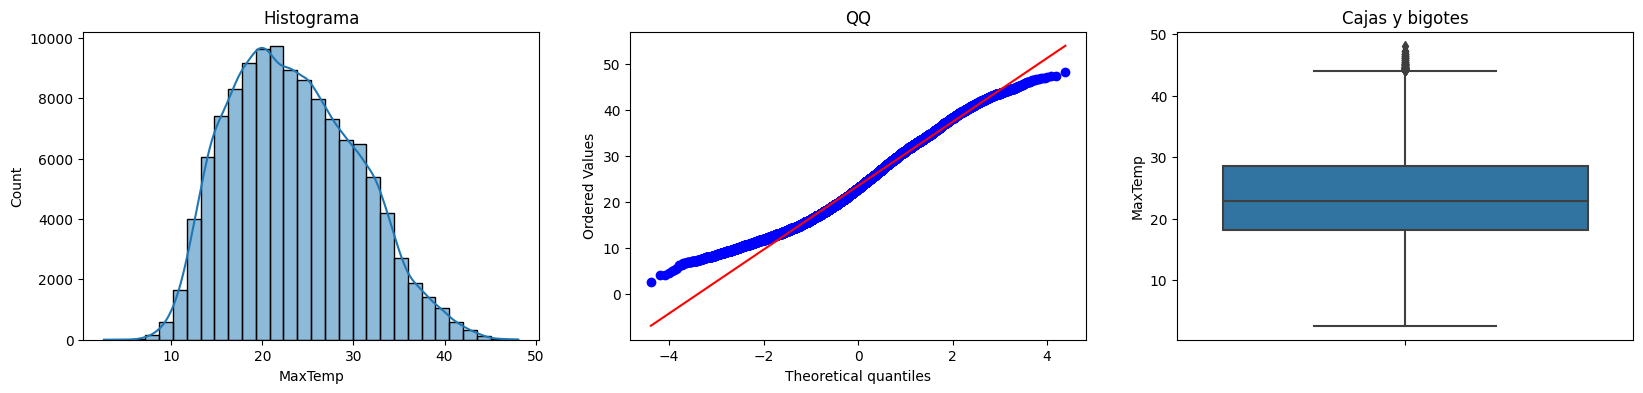

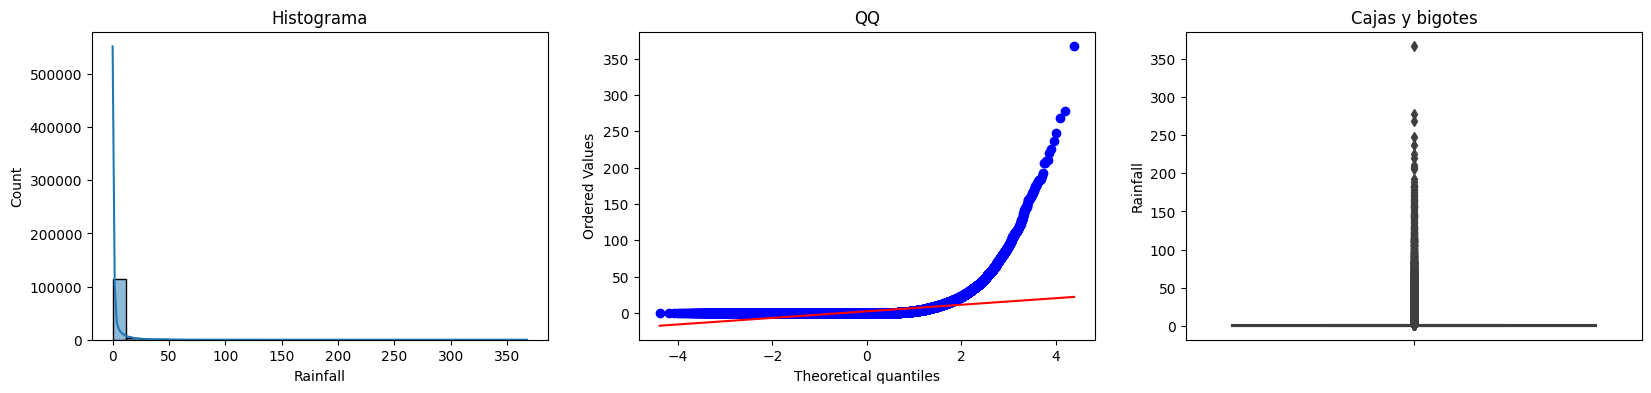

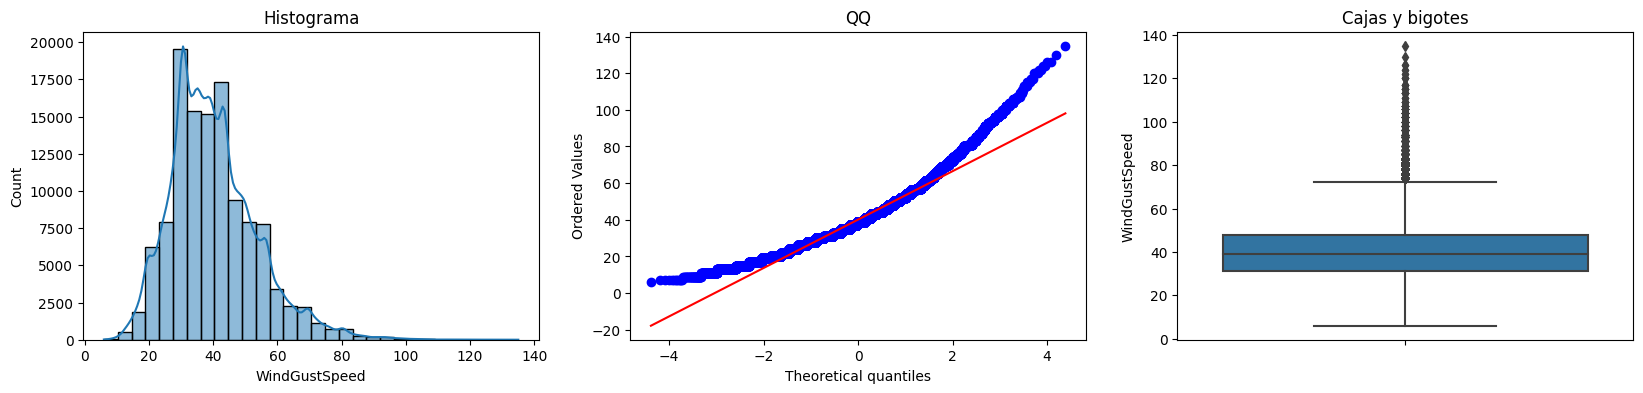

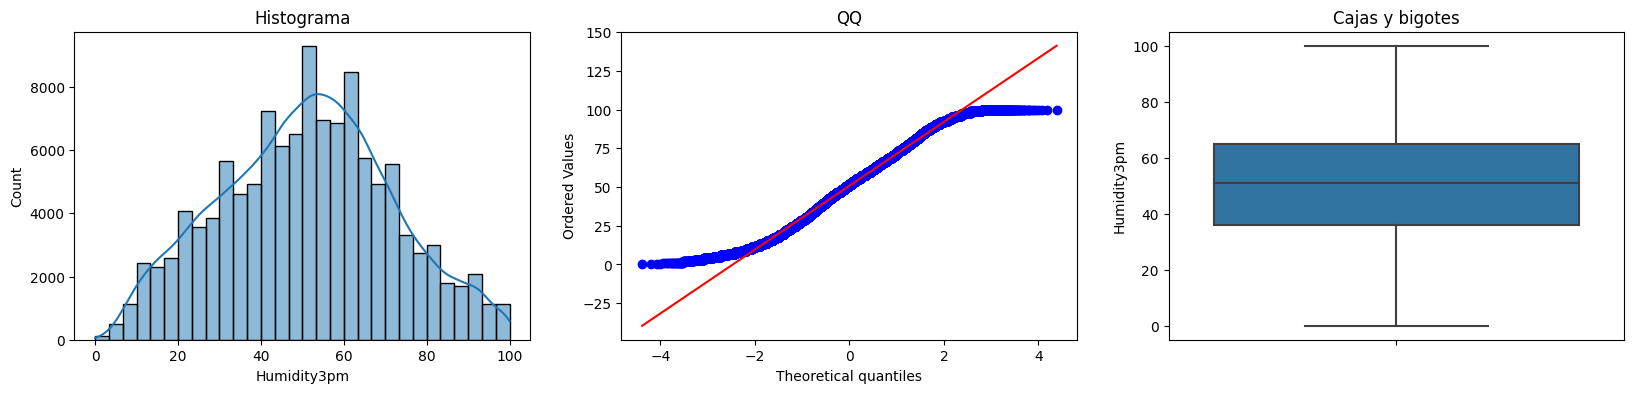

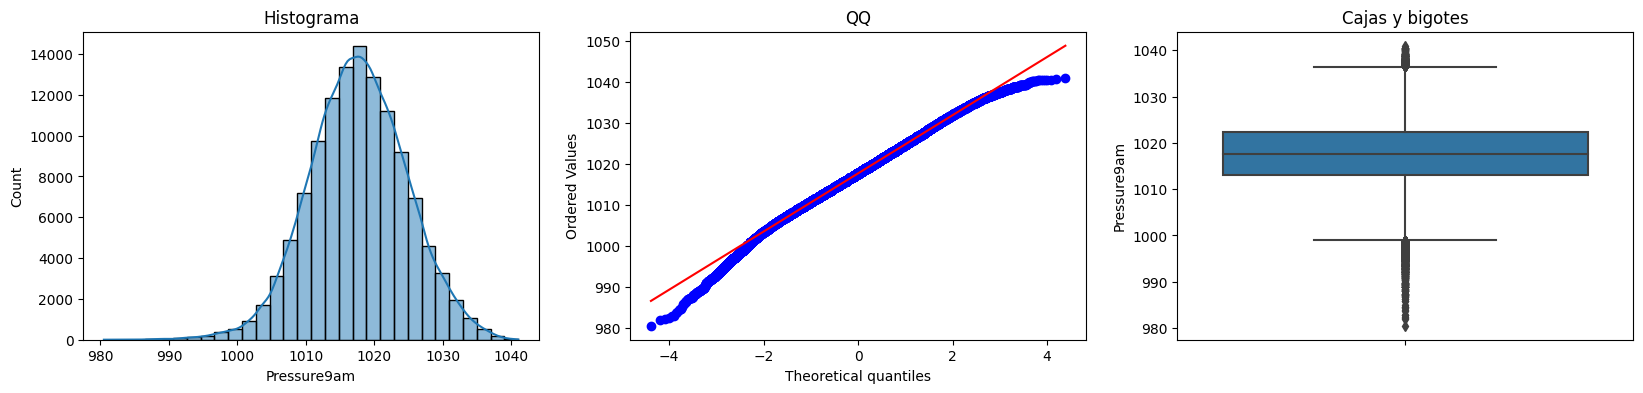

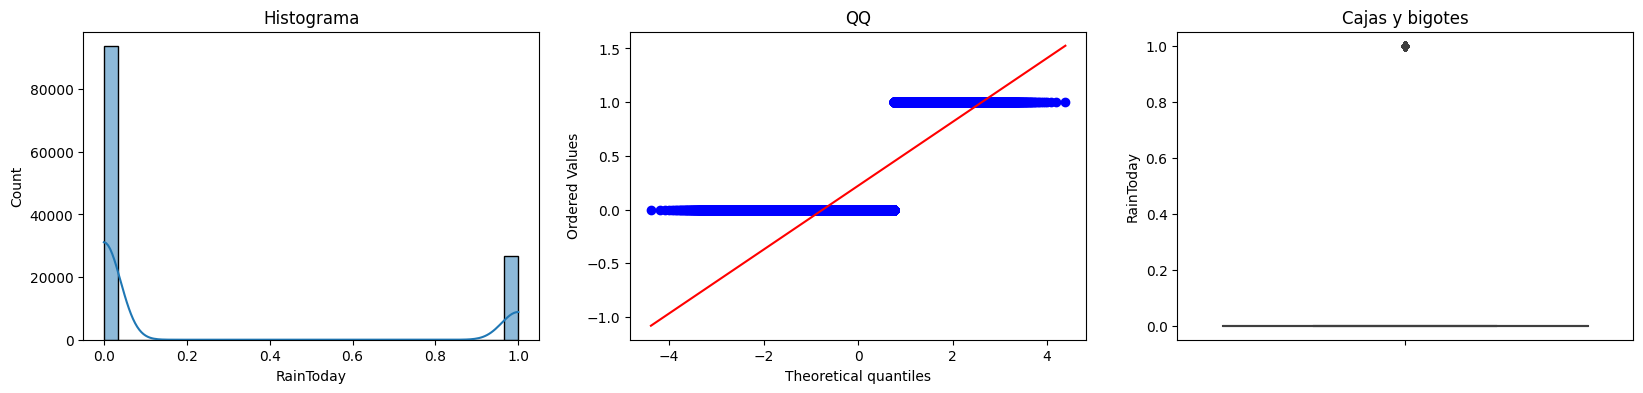

In [72]:
for c in features:
    outlier_diagnostic_plots(df_preprocessed, c)

In [73]:
variables_distr = {
    'MinTemp': 'gauss',
    'MaxTemp': 'gauss',
    'Rainfall': 'no_gauss',
    'WindGustSpeed': 'no_gauss',
    'Humidity3pm': 'gauss',
    'Pressure9am': 'gauss'
}

In [74]:
def find_normal_boundaries(df, variable):
    upper_boundary,lower_boundary = ((df[variable].mean() + 3 * df[variable].std()),(df[variable].mean() - 3 * df[variable].std()))
    return upper_boundary, lower_boundary

def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary, upper_boundary = ((df[variable].quantile(0.25) - (IQR * distance)),(df[variable].quantile(0.75) + (IQR * distance)))
    return upper_boundary, lower_boundary

In [75]:
min_temp_upper_limit, min_temp_lower_limit = find_normal_boundaries(df_preprocessed, 'MinTemp')
outliers_min_temp = np.where(df_preprocessed['MinTemp'] > min_temp_upper_limit, True,
                        np.where(df_preprocessed['MinTemp'] < min_temp_lower_limit, True, False))

In [76]:
max_temp_upper_limit, max_temp_lower_limit = find_normal_boundaries(df_preprocessed, 'MaxTemp')
outliers_max_temp = np.where(df_preprocessed['MaxTemp'] > max_temp_upper_limit, True,
                        np.where(df_preprocessed['MaxTemp'] < max_temp_lower_limit, True, False))

In [77]:
rainfall_upper_limit, rainfall_temp_lower_limit = find_skewed_boundaries(df_preprocessed, 'Rainfall')
outliers_rainfall = np.where(df_preprocessed['Rainfall'] > rainfall_upper_limit, True,
                        np.where(df_preprocessed['Rainfall'] < rainfall_temp_lower_limit, True, False))

In [78]:
wind_gust_speed_upper_limit, wind_gust_speed_temp_lower_limit = find_skewed_boundaries(df_preprocessed, 'WindGustSpeed')
outliers_wind_gust_speed = np.where(df_preprocessed['WindGustSpeed'] > wind_gust_speed_upper_limit, True,
                        np.where(df_preprocessed['WindGustSpeed'] < wind_gust_speed_temp_lower_limit, True, False))

In [79]:
humidity_3pm_upper_limit, humidity_3pm_temp_lower_limit = find_normal_boundaries(df_preprocessed, 'Humidity3pm')
outliers_humidity_3pm = np.where(df_preprocessed['Humidity3pm'] > humidity_3pm_upper_limit, True,
                             np.where(df_preprocessed['Humidity3pm'] < humidity_3pm_temp_lower_limit, True, False))

In [80]:
pressure_9am_upper_limit, pressure_9am_temp_lower_limit = find_normal_boundaries(df_preprocessed, 'Pressure9am')
outliers_pressure_9am = np.where(df_preprocessed['Pressure9am'] > pressure_9am_upper_limit, True,
                             np.where(df_preprocessed['Pressure9am'] < pressure_9am_temp_lower_limit, True, False))

**Hacemos una poda de outliers**

In [81]:
df_trimmed_preprocessed = df_preprocessed.loc[~(outliers_min_temp + outliers_max_temp + outliers_rainfall 
                                      + outliers_wind_gust_speed + outliers_humidity_3pm + outliers_pressure_9am),]
df_preprocessed.shape, df_trimmed_preprocessed.shape

((120336, 14), (94331, 14))

### Escalado de features

In [82]:
columns_to_scale_dict = {
    'MinTemp':0,
    'MaxTemp': 1,
    'Rainfall':2,
    'WindGustSpeed':3,
    'Humidity3pm':4,
    'Pressure9am':5
}
columns_to_scale = list(columns_to_scale_dict.values())
scaler = StandardScaler()
data_scaled = df_trimmed_preprocessed.copy()
data_scaled.iloc[:,columns_to_scale] = scaler.fit_transform(data_scaled.iloc[:,columns_to_scale])

In [83]:
data_scaled.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity3pm,Pressure9am,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,RainToday,RainTomorrow
0,0.192551,-0.190674,1.797102,0.492189,-1.280125,-1.635428,0,0,0,0,0,1,0,0
1,-0.736006,0.127755,-0.382583,0.492189,-1.127187,-1.197773,0,0,0,0,0,1,0,0
2,0.115171,0.214600,-0.382583,0.664410,-0.872289,-1.650520,0,0,0,0,0,1,0,0
3,-0.457439,0.547503,-0.382583,-1.230025,-1.586002,-0.141364,0,0,0,0,0,1,0,0
4,0.827065,1.169888,3.250224,0.233857,-0.719350,-1.167590,0,0,0,0,0,1,0,0


In [84]:
y = data_scaled['RainTomorrow']
X = data_scaled.iloc[:,data_scaled.columns != 'RainTomorrow']

## 4. Propuesta de modelos

Vamos a probar estos dos sencillos modelos, que son muy buenos para clasficiar datasets simples con una variable target categórica:
- Random Forest
- Regresión Logística

### 4.1 Separación de datos

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity3pm,Pressure9am,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,RainToday
120535,0.208027,0.098807,4.703347,0.406078,-0.974248,0.100101,1,0,0,1,0,0,1
48570,0.238979,-0.074882,-0.382583,0.061635,-0.464453,-0.503561,0,0,1,1,1,0,0
9252,-0.318155,-0.972274,-0.382583,-0.282808,-0.056616,-1.348689,0,0,0,1,0,0,0
50668,-1.850275,-0.480155,-0.382583,-1.574468,-0.515432,1.624349,0,0,1,1,1,1,0
82277,-1.478852,-1.768347,-0.382583,-0.713361,1.166893,-0.050814,0,1,1,0,0,1,0


In [87]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

def fitCV(X,y,model):
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)
  accuracy_stratified = []

  for train_index, test_index in skf.split(X, y):
      x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
      y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
      model.fit(x_train_fold, y_train_fold)
      accuracy_stratified.append(model.score(x_test_fold, y_test_fold))

  print('Accuracies:', accuracy_stratified)
  print('Maximum Accuracy That can be obtained from this model is:', max(accuracy_stratified)*100, '%')
  print('Minimum Accuracy:', min(accuracy_stratified)*100, '%')
  print('Overall Accuracy:', mean(accuracy_stratified)*100, '%')
  print('Standard Deviation is:', stdev(accuracy_stratified))

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [89]:
random_forest = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    random_state=42,
    #class_weight='balanced',
).fit(X_train, y_train)

print(f'Accuracy Score of Random Forest: {random_forest.score(X_test,y_test)}')

Accuracy Score of Random Forest: 0.8786770551757036


¿Por qué elegimos **n_estimators = 50**? Porque es el número más óptimo de árboles. Veamos

In [90]:
estimadores = np.arange(1,250, 10)
train_scores = []
test_scores = []

for indx in estimadores:
    rf_classifier = RandomForestClassifier(n_estimators=indx, random_state=42)
    rf_classifier.fit(X_train, y_train)

    train_predictions = rf_classifier.predict(X_train)
    test_predictions = rf_classifier.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

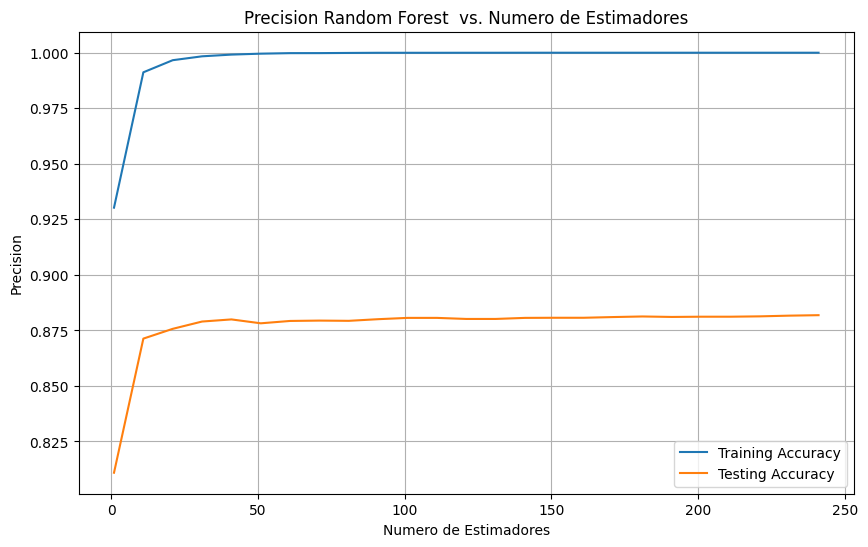

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(estimadores, train_scores, label='Training Accuracy')
plt.plot(estimadores, test_scores, label='Testing Accuracy')
plt.xlabel('Numero de Estimadores')
plt.ylabel('Precision')
plt.title('Precision Random Forest  vs. Numero de Estimadores')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
fitCV(X,y,random_forest)

Accuracies: [0.8788424846300614, 0.8764974027350789, 0.8778755433054172, 0.8778755433054172, 0.874907240538535, 0.8727870242764763, 0.8804198028198876, 0.8789356514364465, 0.8782995865578289, 0.8810558676985053]
Maximum Accuracy That can be obtained from this model is: 88.10558676985053 %
Minimum Accuracy: 87.27870242764763 %
Overall Accuracy: 87.77496147303654 %
Standard Deviation is: 0.002478146165812505


### Regresión Logística

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
# Comentamos ciertos hiperpárametros que estuvimos testeando para mejorar la performance
logistic_regression = LogisticRegression(
#    solver='liblinear',
#    penalty='l1',
#    l1_ratio=0.01,
    random_state=42,
    #max_iter=50,
#    C=100
#    class_weight='balanced'    
).fit(X_train,y_train)

print(f'Accuracy Score of Logistic Regression: {logistic_regression.score(X_test,y_test)}')

Accuracy Score of Logistic Regression: 0.8759209201250862


### 4.3 Evaluación de resultados

Para evaluar y comparar los resultados de los modelos, podemos utilizar algunas de las siguientes herramientas:
- accuracy score
- R<sup>2</sup>
- f-Score
- confusion matrix